# Lab-Assignment
Anitha Rajasekaran - MA661E - VT2021

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [49]:
# Importing all the libraries needed for programming
# Pandas: It's a python libraries used for loading and work with DataFrames
import pandas as pd
# Numpy: for mathematical operation, working with arrays, linear algebra ,fourier transform, and matrices.
import numpy as np
from pandas import DataFrame,read_csv
# sklearn sklearn library contains a lot of efficient tools for machine learning 
# and statistical modeling including classification, regression, clustering and dimensionality reduction.
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
# matplotlib library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt
#seaborn: used for heatmaps and other statistical plots
import seaborn as sns 
#might require installation with: conda install -c anaconda seaborn
from plotnine import *
# Importing statistical function for t-test from scipy
import scipy.stats as stats
# import KMeans
from sklearn.cluster import KMeans
# import nearest neighbors
#from sklearn.neighbors import NearestNeighbors
# import from sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# from ggplot import *
# Saving variables as files on disk
import pickle
import warnings 
warnings.filterwarnings("ignore")
#some warnings are supressed

##1. Data Preparation

>This dataset is downloaded from kaggle https://www.kaggle.com/ahmedkallam/ikea-sa-furniture-web-scraping/version/2.  The dataset is collected from web scraping techniques. The web scraping has been applied on IKEA Saudi Arabian website for the furniture category.

*   item_id : item id which can be used later to merge with other IKEA dataframes
*   name: the commercial name of items
*   category:the furniture category that the item belongs to (Sofas, beds, chairs, Trolleys,…)
*   Price: the current price in Saudi Riyals as it is shown in the website by 4/20/2020
*   old_price: the price of item in Saudi Riyals before discount
*   Short_description: a brief description of the item
*   full_Description: a very detailed description of the item. Because it is long, it is dropped from the final dataframe, but it is available in the code in case it needs to be analyzed.
*   designer: The name of the designer who designed the item. this is extracted from the full_description column.
*   size: the dimensions of the item including a lot of details.As a lot of dimensions mentioned and they vary from item to item,
the most common dimensions have been extracted which are: Height, Width, and    Depth. This column is dropped from the final dataframe, but it is available in the code in case it is needed.
*   width: Width of the item in Centimeter
*   height: Height of the item in Centimeter
*   depth: Depth of the item in Centimeter
*   sellable_Online: if the item is available for online purchasing or in-stores only (Boolean)
*   other_colors: if other colors are available for the item, or just one color as displayed in the website (Boolean)
*   link: the web link of the item




###1.1. Reading Data from Files - Print list of column name

In [50]:
#loading data from the csv-text file into a pandas DataFrame-variable
#google drive path assign to the variable
DATA_DIR = '/content/gdrive/MyDrive/IKEA_SA_Furniture_Web_Scrapings_sss.csv'
# display all columns and all rows
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = pd.read_csv(DATA_DIR)
df.head(3)

Unnamed: 0   item_id                   name       category   price  \
0           0  90420332               FREKVENS  Bar furniture   265.0   
1           1    368814              NORDVIKEN  Bar furniture   995.0   
2           2   9333523  NORDVIKEN / NORDVIKEN  Bar furniture  2095.0   

      old_price  sellable_online  \
0  No old price             True   
1  No old price            False   
2  No old price            False   

                                                link other_colors  \
0  https://www.ikea.com/sa/en/p/frekvens-bar-tabl...           No   
1  https://www.ikea.com/sa/en/p/nordviken-bar-tab...           No   
2  https://www.ikea.com/sa/en/p/nordviken-nordvik...           No   

                                  short_description              designer  \
0          Bar table, in/outdoor,          51x51 cm  Nicholai Wiig Hansen   
1                     Bar table,          140x80 cm     Francis Cayouette   
2                        Bar table and 4 bar stools     Francis Cayouette   

   depth  height  width  
0    NaN    99.0   51.0  
1    NaN   105.0   80.0  
2    NaN     NaN    NaN

In [51]:
# COnverting the "No old price"to 0 
df1 = df.copy()
df1.loc[df1['old_price'] == "No old price", 'old_price'] = 0
df1['old_price'] = df1['old_price'].map(lambda x: str(x).replace('SR',''))
df1['old_price'] = df1['old_price'].map(lambda x: str(x).replace(',',''))
df1['old_price'] = df1['old_price'].map(lambda x: str(x).replace('/',''))
df1['old_price'] = df1['old_price'].map(lambda x: str(x).replace('pack',''))
df1.head(4)

Unnamed: 0   item_id                   name       category   price  \
0           0  90420332               FREKVENS  Bar furniture   265.0   
1           1    368814              NORDVIKEN  Bar furniture   995.0   
2           2   9333523  NORDVIKEN / NORDVIKEN  Bar furniture  2095.0   
3           3  80155205                   STIG  Bar furniture    69.0   

  old_price  sellable_online  \
0         0             True   
1         0            False   
2         0            False   
3         0             True   

                                                link other_colors  \
0  https://www.ikea.com/sa/en/p/frekvens-bar-tabl...           No   
1  https://www.ikea.com/sa/en/p/nordviken-bar-tab...           No   
2  https://www.ikea.com/sa/en/p/nordviken-nordvik...           No   
3  https://www.ikea.com/sa/en/p/stig-bar-stool-wi...          Yes   

                                  short_description              designer  \
0          Bar table, in/outdoor,          51x51 cm  Nicholai Wiig Hansen   
1                     Bar table,          140x80 cm     Francis Cayouette   
2                        Bar table and 4 bar stools     Francis Cayouette   
3           Bar stool with backrest,          74 cm         Henrik Preutz   

   depth  height  width  
0    NaN    99.0   51.0  
1    NaN   105.0   80.0  
2    NaN     NaN    NaN  
3   50.0   100.0   60.0

>The old price column has converted from "No old price" to '0' to compare with the new price and to find the difference.



In [ ]:
# df1['old_price'] = df1['old_price'].map(lambda x: str(x).replace('SR',''))
# df1['old_price'] = df1['old_price'].map(lambda x: str(x).replace(',',''))
# df1['old_price'] = df.apply(lambda x: x['price'] if x['old_price']==0 else x['old_price'], axis=1)
# df1

In [52]:
# Converting the '0' in old_price value to the price value.
df1['old_price'] = df1.apply(lambda x: x['price'] if x['old_price']=='0' else x['old_price'], axis=1)
df1['old_price'] = df1['old_price'].astype(float) 
df1.head(10)

Unnamed: 0   item_id                   name       category   price  \
0           0  90420332               FREKVENS  Bar furniture   265.0   
1           1    368814              NORDVIKEN  Bar furniture   995.0   
2           2   9333523  NORDVIKEN / NORDVIKEN  Bar furniture  2095.0   
3           3  80155205                   STIG  Bar furniture    69.0   
4           4  30180504                NORBERG  Bar furniture   225.0   
5           5  10122647                 INGOLF  Bar furniture   345.0   
6           6  70404875               FRANKLIN  Bar furniture   129.0   
7           7  60155602                DALFRED  Bar furniture   195.0   
8           8  50406465               FRANKLIN  Bar furniture   129.0   
9           9  69304221    EKEDALEN / EKEDALEN  Bar furniture  2176.0   

   old_price  sellable_online  \
0      265.0             True   
1      995.0            False   
2     2095.0            False   
3       69.0             True   
4      225.0             True   
5      345.0             True   
6      129.0             True   
7      195.0             True   
8      129.0             True   
9     2375.0             True   

                                                link other_colors  \
0  https://www.ikea.com/sa/en/p/frekvens-bar-tabl...           No   
1  https://www.ikea.com/sa/en/p/nordviken-bar-tab...           No   
2  https://www.ikea.com/sa/en/p/nordviken-nordvik...           No   
3  https://www.ikea.com/sa/en/p/stig-bar-stool-wi...          Yes   
4  https://www.ikea.com/sa/en/p/norberg-wall-moun...           No   
5  https://www.ikea.com/sa/en/p/ingolf-bar-stool-...           No   
6  https://www.ikea.com/sa/en/p/franklin-bar-stoo...           No   
7  https://www.ikea.com/sa/en/p/dalfred-bar-stool...           No   
8  https://www.ikea.com/sa/en/p/franklin-bar-stoo...           No   
9  https://www.ikea.com/sa/en/p/ekedalen-ekedalen...           No   

                                   short_description              designer  \
0           Bar table, in/outdoor,          51x51 cm  Nicholai Wiig Hansen   
1                      Bar table,          140x80 cm     Francis Cayouette   
2                         Bar table and 4 bar stools     Francis Cayouette   
3            Bar stool with backrest,          74 cm         Henrik Preutz   
4          Wall-mounted drop-leaf table,         ...        Marcus Arvonen   
5            Bar stool with backrest,          63 cm          Carina Bengs   
6          Bar stool with backrest, foldable,    ...   K Hagberg/M Hagberg   
7                       Bar stool,          63-74 cm           Sarah Fager   
8          Bar stool with backrest, foldable,    ...   K Hagberg/M Hagberg   
9                         Bar table and 4 bar stools       Ehlén Johansson   

   depth  height  width  
0    NaN    99.0   51.0  
1    NaN   105.0   80.0  
2    NaN     NaN    NaN  
3   50.0   100.0   60.0  
4   60.0    43.0   74.0  
5   45.0    91.0   40.0  
6   44.0    95.0   50.0  
7   50.0     NaN   50.0  
8   44.0    95.0   50.0  
9    NaN     NaN    NaN

In [53]:
df1.dtypes


Unnamed: 0             int64
item_id                int64
name                  object
category              object
price                float64
old_price            float64
sellable_online         bool
link                  object
other_colors          object
short_description     object
designer              object
depth                float64
height               float64
width                float64
dtype: object

In [54]:
#print all the columns name of the country-wise-average data.
df1.columns
df1.shape


(3694, 14)

>The IKEA Furniture dataset has 3694 column and 14 rows.

###1.1.1.Explaining Column Names

Following is a description of IKEA dataset. Notice there are both numeric and categorical columns. The datset contains 3694 rows and 14 columns

Column | Description| Data Type| Feature
------------|------------------------|-----------------|-------------
item_id | item id wich can be used later to merge with other IKEA dataframes|int64| Numerical
name|the commercial name of items |object| Text
category|the furniture category that the item belongs to (Sofas, beds, chairs, Trolleys,…)|object|Text
Price| the current price in Saudi Riyals as it is shown in the website by 4/20/2020|float64| Numerical
old_price| the price of item in Saudi Riyals before discount|float64|Numerical
sellable_Online| if the item is available for online purchasing or in-stores|bool|Text
link| the web link of the item|object|Text
other_colors| if other colors are available for the item, or just one color as displayed in the website|object|Text
Short_description| a brief description of the item|object|Text
designer| The name of the designer who designed the item. this is extracted from the full_description column|object|Text
depth| Depth of the item in Centimeter|float64|Numerical
height| Depth of the item in Centimeter|float64|Numerical
width| Depth of the item in Centimeter|float64|Numerical


























#1.2 Manipulating Data

###1.2.1 Finding and handling missing values
Handling missing values is an essential part of data cleaning and preparation process because almost all data in real life comes with some missing values.
The source of missing value may br typing errors i.e forgot to fill in, programming error, mistakes with the decimal points, user choose not filled in the column.

To detect the missing values pandas provides the function `isnull()` and `isna()`

In [55]:
df1.isnull().sum()

Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

>Here, only few columns were missing.

In [56]:
df1.isnull().sum().sum()

3040

>Hence, of 3694 records up to 3040 contain missing values.


 

In [57]:
#  Example: Deleting all the rows with missing data
dFDropna=df1.copy()#making coyp of the original data
print(dFDropna.shape)#dimension of the data before removing rows
dFDropna=dFDropna.dropna()#need to save results
print(dFDropna.shape)
#dimension of the data after removing rows
print('Total number of missing values after dropna: ',dFDropna.isnull().sum().sum())

(3694, 14)
(1899, 14)
Total number of missing values after dropna:  0


>After drop all the missing values column the total number of rows remaining 1899 column and 14 rows.

In [58]:
dFDropna.nunique()

Unnamed: 0           1899
item_id              1602
name                  289
category               17
price                 729
old_price             661
sellable_online         2
link                 1602
other_colors            2
short_description     992
designer              191
depth                 108
height                178
width                 241
dtype: int64

>Data Type of all the columns


In [59]:
dFDropna.dtypes

Unnamed: 0             int64
item_id                int64
name                  object
category              object
price                float64
old_price            float64
sellable_online         bool
link                  object
other_colors          object
short_description     object
designer              object
depth                float64
height               float64
width                float64
dtype: object

###1.2.2. Converting Categorical Data
>Categoricals are a pandas data type corresponding to categorical variables in statistics. A categorical variable takes on a limited, and usually fixed, number of possible values. Examples are gender Male and Female as 1 and 2 ...


In [60]:
print(dFDropna.category.nunique(),' categories in Category: ',dFDropna.category.unique())
print(dFDropna.sellable_online.nunique(), 'sellable online : ',dFDropna.sellable_online.unique())

17  categories in Category:  ['Bar furniture' 'Beds' 'Bookcases & shelving units'
 'Cabinets & cupboards' 'Café furniture' 'Chairs'
 'Chests of drawers & drawer units' "Children's furniture"
 'Nursery furniture' 'Outdoor furniture' 'Room dividers'
 'Sideboards, buffets & console tables' 'Sofas & armchairs'
 'Tables & desks' 'Trolleys' 'TV & media furniture' 'Wardrobes']
2 sellable online :  [ True False]


In [61]:
#Example: Documenting the number of data points for each category with the function value_counts()
print('value counts of Category: \n',dFDropna.category.value_counts(),"\n")
print('value counts of sellable online: \n' ,dFDropna.sellable_online.value_counts(),"\n")

value counts of Category: 
 Bookcases & shelving units              375
Sofas & armchairs                       223
Chairs                                  213
Cabinets & cupboards                    199
Wardrobes                               199
Chests of drawers & drawer units        121
Tables & desks                          103
TV & media furniture                     95
Outdoor furniture                        81
Children's furniture                     78
Beds                                     78
Nursery furniture                        62
Bar furniture                            24
Sideboards, buffets & console tables     20
Café furniture                           13
Trolleys                                  9
Room dividers                             6
Name: category, dtype: int64 

value counts of sellable online: 
 True     1886
False      13
Name: sellable_online, dtype: int64 



In [62]:
#checking for the missing values
dFDropna.isnull().sum()

Unnamed: 0           0
item_id              0
name                 0
category             0
price                0
old_price            0
sellable_online      0
link                 0
other_colors         0
short_description    0
designer             0
depth                0
height               0
width                0
dtype: int64

> The column sellable_online and category has been converted to numbersaccording to the category.eg: sellable as false = '0' and True = '1'.

In [63]:
#Example: Use of LabelEncoder to convert the categories in 'category' into a new column 'Number for Categories'
le=preprocessing.LabelEncoder()#defines the labelEncoder
labelencoder=dFDropna.copy()
labelencoder['Number_for_Categories']=le.fit_transform(labelencoder['category'])
labelencoder['sellable_online'] = le.fit_transform(labelencoder['sellable_online'])
labelencoder['other_colors'] = le.fit_transform(labelencoder['other_colors'])
#label encoder learns from the data and then transforms it
labelencoder.head(50)

Unnamed: 0   item_id        name       category   price  old_price  \
3             3  80155205        STIG  Bar furniture    69.0       69.0   
4             4  30180504     NORBERG  Bar furniture   225.0      225.0   
5             5  10122647      INGOLF  Bar furniture   345.0      345.0   
6             6  70404875    FRANKLIN  Bar furniture   129.0      129.0   
8             8  50406465    FRANKLIN  Bar furniture   129.0      129.0   
10           10  90404879    FRANKLIN  Bar furniture   149.0      149.0   
11           11    121766      INGOLF  Bar furniture   395.0      395.0   
12           12    397736    NORRARYD  Bar furniture   395.0      395.0   
13           13  50420329    FREKVENS  Bar furniture   177.0      295.0   
14           14    400550    EKEDALEN  Bar furniture   345.0      345.0   
16           16  40426138  HENRIKSDAL  Bar furniture   395.0      395.0   
18           18  70246089     JANINGE  Bar furniture   595.0      595.0   
19           19  60406785    FRANKLIN  Bar furniture   149.0      149.0   
21           21  30352246      RÅSKOG  Bar furniture   175.0      175.0   
22           22  10281354     JANINGE  Bar furniture   595.0      595.0   
24           24    400545    EKEDALEN  Bar furniture   345.0      345.0   
25           25  10400540    EKEDALEN  Bar furniture   345.0      345.0   
27           27  90319918  HENRIKSDAL  Bar furniture   695.0      695.0   
31           31  39184324  HENRIKSDAL  Bar furniture   435.0      435.0   
35           35  20429010    NORRÅKER  Bar furniture   395.0      395.0   
36           36  80369112   NORDVIKEN  Bar furniture   275.0      275.0   
40           40    272656    BERNHARD  Bar furniture   745.0      745.0   
44           44  30135658       GLENN  Bar furniture   445.0      445.0   
46           46  30308395      RÅSKOG  Bar furniture   175.0      175.0   
48           48  49278341     BRIMNES           Beds   895.0      925.0   
50           50  89326463      PLATSA           Beds  2111.0     2205.0   
51           51  50468953   VATTVIKEN           Beds   995.0      995.0   
61           61  20400691     BRIMNES           Beds   575.0      575.0   
67           67  19175957        MALM           Beds   920.0      920.0   
70           70  79902935     BRIMNES           Beds   575.0      575.0   
71           71  90349326      HEMNES           Beds  1495.0     1495.0   
74           74  79012991        MALM           Beds   670.0      670.0   
80           80  89305446      PLATSA           Beds  2600.5     2880.0   
86           86  90354327     HAMMARN           Beds   399.0      399.0   
89           89   9241420      NORDLI           Beds  2290.0     2290.0   
91           91  69241097   SONGESAND           Beds   570.0      570.0   
96           96  60116960    LYCKSELE           Beds   100.0      100.0   
111         111  60372276      HEMNES           Beds  1495.0     1495.0   
113         113  99239451       SLÄKT           Beds   620.0      620.0   
119         119   9306416      NYHAMN           Beds  1470.0     1470.0   
121         121  29291956       SLÄKT           Beds  1395.0     1395.0   
122         122  70284203      ASKEBY           Beds   995.0      995.0   
123         123  20228709     BRIMNES           Beds   220.0      220.0   
126         126   9186126      HEMNES           Beds  2185.0     2185.0   
129         129  40349847      NORDLI           Beds  1595.0     1595.0   
133         133  39277498  VALLENTUNA           Beds  1848.0     2310.0   
134         134  40411410      VITVAL           Beds   200.0      200.0   
135         135  89302914      PLATSA           Beds  2307.0     2560.0   
136         136  10453086      PLATSA           Beds  1195.0     1195.0   
137         137   9324284      PLATSA           Beds  3339.0     3760.0   

     sellable_online                                               link  \
3                  1  https://www.ikea.com/sa/en/p/stig-bar-stool-wi...   
4                  1  https:/

In [64]:
labelencoder.dtypes

Unnamed: 0                 int64
item_id                    int64
name                      object
category                  object
price                    float64
old_price                float64
sellable_online            int64
link                      object
other_colors               int64
short_description         object
designer                  object
depth                    float64
height                   float64
width                    float64
Number_for_Categories      int64
dtype: object

> Calculating Volumn for the item by multipling depth,height,width.


In [65]:
#find the volume of the item
vol_column = labelencoder["depth"] *labelencoder["height"] * labelencoder["width"]
labelencoder["Volume"] = vol_column
labelencoder.head(5)

Unnamed: 0   item_id      name       category  price  old_price  \
3           3  80155205      STIG  Bar furniture   69.0       69.0   
4           4  30180504   NORBERG  Bar furniture  225.0      225.0   
5           5  10122647    INGOLF  Bar furniture  345.0      345.0   
6           6  70404875  FRANKLIN  Bar furniture  129.0      129.0   
8           8  50406465  FRANKLIN  Bar furniture  129.0      129.0   

   sellable_online                                               link  \
3                1  https://www.ikea.com/sa/en/p/stig-bar-stool-wi...   
4                1  https://www.ikea.com/sa/en/p/norberg-wall-moun...   
5                1  https://www.ikea.com/sa/en/p/ingolf-bar-stool-...   
6                1  https://www.ikea.com/sa/en/p/franklin-bar-stoo...   
8                1  https://www.ikea.com/sa/en/p/franklin-bar-stoo...   

   other_colors                                  short_description  \
3             1            Bar stool with backrest,          74 cm   
4             0          Wall-mounted drop-leaf table,         ...   
5             0            Bar stool with backrest,          63 cm   
6             0          Bar stool with backrest, foldable,    ...   
8             0          Bar stool with backrest, foldable,    ...   

              designer  depth  height  width  Number_for_Categories    Volume  
3        Henrik Preutz   50.0   100.0   60.0                      0  300000.0  
4       Marcus Arvonen   60.0    43.0   74.0                      0  190920.0  
5         Carina Bengs   45.0    91.0   40.0                      0  163800.0  
6  K Hagberg/M Hagberg   44.0    95.0   50.0                      0  209000.0  
8  K Hagberg/M Hagberg   44.0    95.0   50.0                      0  209000.0

###1.2.3. Aggregation of Data
The data is organized according to the category. Here, we can compare the average price of the items with the price To calculate averages for a group is data aggregation.

In [66]:
#Aggregation of data
aggregate_data = labelencoder.copy()
aggregated=aggregate_data.groupby('category')[['price','width', 'height', 'depth','Volume']].mean()
aggregated

price       width      height  \
category                                                                    
Bar furniture                          338.416667   45.833333   94.666667   
Beds                                  2580.769231  174.423077   67.153846   
Bookcases & shelving units             685.849600  119.930667  138.688000   
Cabinets & cupboards                  1113.319095  111.231156  123.738693   
Café furniture                         332.615385   48.615385   78.692308   
Chairs                                 546.409390   60.859155   79.755869   
Chests of drawers & drawer units       629.698347   77.280992   79.528926   
Children's furniture                   326.500000   65.730769   83.961538   
Nursery furniture                      404.580645   70.387097   93.225806   
Outdoor furniture                     1120.219753  113.160494   81.864198   
Room dividers                          817.500000  158.666667  158.666667   
Sideboards, buffets & console tables  1156.550000  128.350000  116.100000   
Sofas & armchairs                     3009.560538  196.565022   83.816143   
TV & media furniture                  1085.726316  168.768421  110.852632   
Tables & desks                         522.446602   74.786408   77.640777   
Trolleys                               934.222222   84.111111   90.888889   
Wardrobes                             2146.135678  161.537688  214.814070   

                                           depth        Volume  
category                                                        
Bar furniture                          47.541667  2.046933e+05  
Beds                                   82.756410  1.304045e+06  
Bookcases & shelving units             38.280000  7.185313e+05  
Cabinets & cupboards                   39.155779  6.072833e+05  
Café furniture                         45.153846  1.765547e+05  
Chairs                                 62.197183  3.539957e+05  
Chests of drawers & drawer units       47.157025  3.014360e+05  
Children's furniture                   43.076923  2.633469e+05  
Nursery furniture                      43.370968  3.196872e+05  
Outdoor furniture                      73.074074  7.898542e+05  
Room dividers                          39.000000  9.924460e+05  
Sideboards, buffets & console tables   41.100000  5.898073e+05  
Sofas & armchairs                     107.542601  2.082002e+06  
TV & media furniture                   40.610526  8.927021e+05  
Tables & desks                         46.407767  3.429345e+05  
Trolleys                               49.777778  4.299080e+05  
Wardrobes                              56.608040  2.049891e+06

In [67]:
aggregated2=aggregated.copy()
#making a copy in order to keep the data frame with country-indexes
aggregated=aggregated.reset_index()
aggregated.head(3)

category        price       width      height      depth  \
0               Bar furniture   338.416667   45.833333   94.666667  47.541667   
1                        Beds  2580.769231  174.423077   67.153846  82.756410   
2  Bookcases & shelving units   685.849600  119.930667  138.688000  38.280000   

         Volume  
0  2.046933e+05  
1  1.304045e+06  
2  7.185313e+05

In [68]:
aggregate_data1 = dFDropna.copy()
aggregated1=aggregate_data1.groupby('category')['price'].sum()
aggregated1

category
Bar furniture                             8122.0
Beds                                    201300.0
Bookcases & shelving units              257193.6
Cabinets & cupboards                    221550.5
Café furniture                            4324.0
Chairs                                  116385.2
Chests of drawers & drawer units         76193.5
Children's furniture                     25467.0
Nursery furniture                        25084.0
Outdoor furniture                        90737.8
Room dividers                             4905.0
Sideboards, buffets & console tables     23131.0
Sofas & armchairs                       671132.0
TV & media furniture                    103144.0
Tables & desks                           53812.0
Trolleys                                  8408.0
Wardrobes                               427081.0
Name: price, dtype: float64

The above code gives the sum of the price amount of the item.

In [69]:
#Example: Pickling the variables rawdata, dfLE,LEAggregated, LEAggregated2 into a file with the name "Tutorial_T1_Results.pickle"
#OBS: Deactivate this cell if you are using Google Colab and activate the next cell instead!
d_out=open("/content/gdrive/My Drive/MA661E/Aggregate_Results.pickle","wb")#"wb" defines the writing mode for the file
pickle.dump([df1,labelencoder,aggregated,aggregated2],d_out)#dump the content of variable refData into the file
d_out.close()# never forget to close an open file!

In [70]:
d_in=open("/content/gdrive/My Drive/MA661E/Aggregate_Results.pickle","rb")
# "rb" defines the reading mode for the file# using other variable names
[df1,labelencoder,aggregated,aggregated2]=pickle.load(d_in)
d_in.close()# never forget to close an open file!

##2. Exploring Data
After preparing the data you can proceed with exploring it.

###2.1. Analyzing the feasibility of values
A good starting point to get a feeling for the single variables is to get an overview over their statistical description. By looking at the min- and max- values, the means and deviations and at the first, second and third quartil, one can get an idea about the range of the data, its center and how the data is spread from the center.

In [71]:
labelencoder.loc[:,['price','old_price']].describe()

price    old_price
count  1899.000000  1899.000000
mean   1220.626962  1275.513428
std    1422.088876  1493.260983
min       6.000000    10.000000
25%     295.000000   310.000000
50%     680.000000   695.000000
75%    1589.000000  1650.000000
max    9585.000000  9685.000000

In [72]:
# BELOW 50 REMOVE THE COLUMN
#Removing unfeasible values
#Example: Calculating the number of rows that we would like to delete
# delete_row = ((labelencoder['price']<=295)).sum()
# delete_row 
labelencoder=labelencoder.drop(columns=['Unnamed: 0','link','designer','name'])
labelencoder


item_id                              category   price  old_price  \
3     80155205                         Bar furniture    69.0       69.0   
4     30180504                         Bar furniture   225.0      225.0   
5     10122647                         Bar furniture   345.0      345.0   
6     70404875                         Bar furniture   129.0      129.0   
8     50406465                         Bar furniture   129.0      129.0   
10    90404879                         Bar furniture   149.0      149.0   
11      121766                         Bar furniture   395.0      395.0   
12      397736                         Bar furniture   395.0      395.0   
13    50420329                         Bar furniture   177.0      295.0   
14      400550                         Bar furniture   345.0      345.0   
16    40426138                         Bar furniture   395.0      395.0   
18    70246089                         Bar furniture   595.0      595.0   
19    60406785                         Bar furniture   149.0      149.0   
21    30352246                         Bar furniture   175.0      175.0   
22    10281354                         Bar furniture   595.0      595.0   
24      400545                         Bar furniture   345.0      345.0   
25    10400540                         Bar furniture   345.0      345.0   
27    90319918                         Bar furniture   695.0      695.0   
31    39184324                         Bar furniture   435.0      435.0   
35    20429010                         Bar furniture   395.0      395.0   
36    80369112                         Bar furniture   275.0      275.0   
40      272656                         Bar furniture   745.0      745.0   
44    30135658                         Bar furniture   445.0      445.0   
46    30308395                         Bar furniture   175.0      175.0   
48    49278341                                  Beds   895.0      925.0   
50    89326463                                  Beds  2111.0     2205.0   
51    50468953                                  Beds   995.0      995.0   
61    20400691                                  Beds   575.0      575.0   
67    19175957                                  Beds   920.0      920.0   
70    79902935                                  Beds   575.0      575.0   
71    90349326                                  Beds  1495.0     1495.0   
74    79012991                                  Beds   670.0      670.0   
80    89305446                                  Beds  2600.5     2880.0   
86    90354327                                  Beds   399.0      399.0   
89     9241420                                  Beds  2290.0     2290.0   
91    69241097                                  Beds   570.0      570.0   
96    60116960                                  Beds   100.0      100.0   
111   60372276                                  Beds  1495.0     1495.0   
113   99239451                                  Beds   620.0      620.0   
119    9306416                                  Beds  1470.0     1470.0   
121   29291956                                  Beds  1395.0     1395.0   
122   70284203                                  Beds   995.0      995.0   
123   20228709                                  Beds   220.0      220.0   
126    9186126                                  Beds  2185.0     2185.0   
129   40349847                                  Beds  1595.0     1595.0   
133   39277498                                  Beds  1848.0     2310.0   
134   40411410                                  Beds   200.0      200.0   
135   89302914                                  Beds  2307.0     2560.0   
136   10453086                                  Beds  1195.0     1195.0   
137    9324284                                  Beds  3339.0     3760.0   
141     228705                                  Beds  1095.0     1095.0   
142   29241160                                  Beds  1245.0     1245.0   
144   89386070                  

In [ ]:
# Converting the data type of the old_price from object to float value.
# cols = ['old_price']
# labelencoder[cols] = labelencoder[cols].replace(',','.', regex=True).astype(float)
# labelencoder

In [75]:
delIndex=labelencoder[((labelencoder['price']<=100))].index
labelencoder=labelencoder.drop(delIndex)

In [ ]:
# Example: Statistical description of all the variables
#since there are too many columns not all of them will be shown.
#we divide the columns into two parts and use print() in order to show both at the same time


###2.2. Univariate data analysis

Afte removing missing data, we can calculate the statistical properties of the single values and to find the density of the function "Kernel Density Estimation (KDE)" method is used.





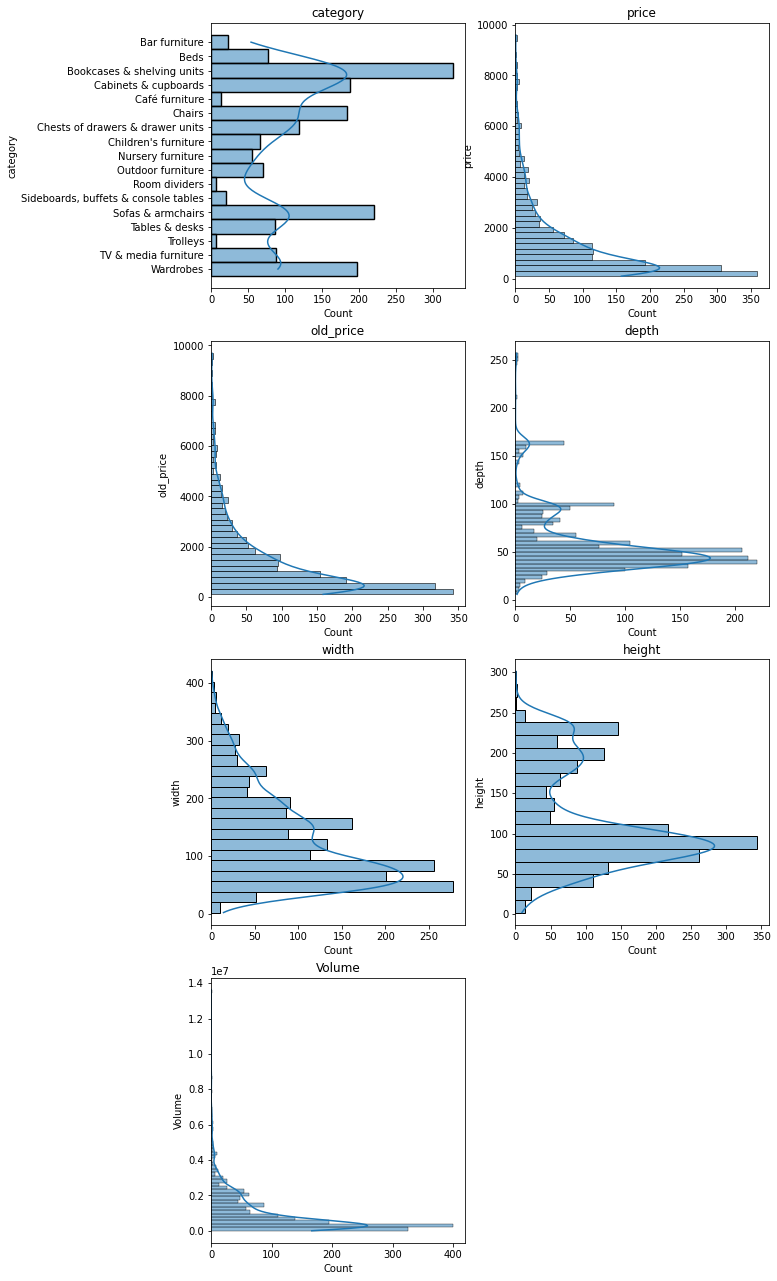

In [76]:
#Example: plotting histogram and KDE of several values in a for-loop
columns=['category','price','old_price','depth','width','height','Volume']

fig=plt.figure(figsize=(10,40))#7 plots in 2 columns =>3 rows


i=1
for col in columns:
  plt.subplot(7,2,i)
  #combination of histogram and KDE with seaborns histplot()
  sns.histplot(y=labelencoder[col],kde=True)
  plt.title(col)#setting title of the histogram
  # plt.xticks(rotation=20)
  i=i+1


####2.2.1 Boxplot and handling of outliers
>It is graphical tool to display the center and spread of the data. 
A boxplot is a standardized way of displaying the values based on: the minimum, the maximum, the sample median, and the first and third quartiles.
* The horizontal bars at the bottom and top (called the whiskers of the boxplot) represent the minimum and maximum of the data points, excluding any outliers.
* The bottom and top of the box represent the 25% and 75% quartiles. The lower quartile is the median of the lower half of the dataset. 
* The upper quartile is the median of the upper half of the dataset.The line inside the box represents the median or 50% quartile.
* Any data not included between the whiskers should be plotted as an outlier with a dot, small circle, or star.

{'boxes': [<matplotlib.lines.Line2D at 0x7f4ded0a4a50>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4ded6c6f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4df163d610>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4df163d210>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4ded760110>,
  <matplotlib.lines.Line2D at 0x7f4decc6ed50>]}

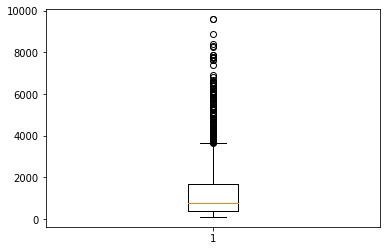

In [77]:
 bp = plt.boxplot(labelencoder['price'])
 bp
# sns.histplot(x=dFDropna['price'],kde=True)
# np.random.seed(2345)
# df = pd.DataFrame(np.random.randn(20,2),
#                   columns=['price', 'old_price'])
# boxplot = df.boxplot(column=['price', 'old_price'])


{'boxes': [<matplotlib.lines.Line2D at 0x7f4ded0aa190>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4ded57cad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4df16ee690>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4ded57c850>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4ded0aae10>,
  <matplotlib.lines.Line2D at 0x7f4ded0aa750>]}

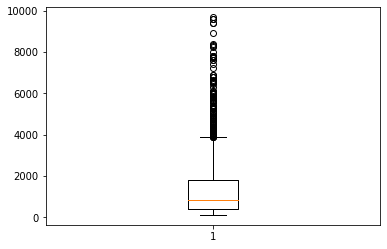

In [78]:
bp1 = plt.boxplot(labelencoder['old_price'])
bp1

###Calculation of whisker's min-/max-position in boxplots.
>By definition, the min- and max-values of the whiskers in the boxplot show the limits of the expected values. Values outside these limits are therefore considered outliers. These max and min values can be calculated by help of the socalled interquartile range (IQR). 
we can calculate first IQR and then the min and max values in the following way:

* IQR= third quartile - first quartile
* maximum= third quartile + 1,5*IQR
* minimum= first quartile - 1,5*IQR

In [79]:
columns=['price','old_price','height', 'depth','width']
labelencoder.dtypes

item_id                    int64
category                  object
price                    float64
old_price                float64
sellable_online            int64
other_colors               int64
short_description         object
depth                    float64
height                   float64
width                    float64
Number_for_Categories      int64
Volume                   float64
dtype: object

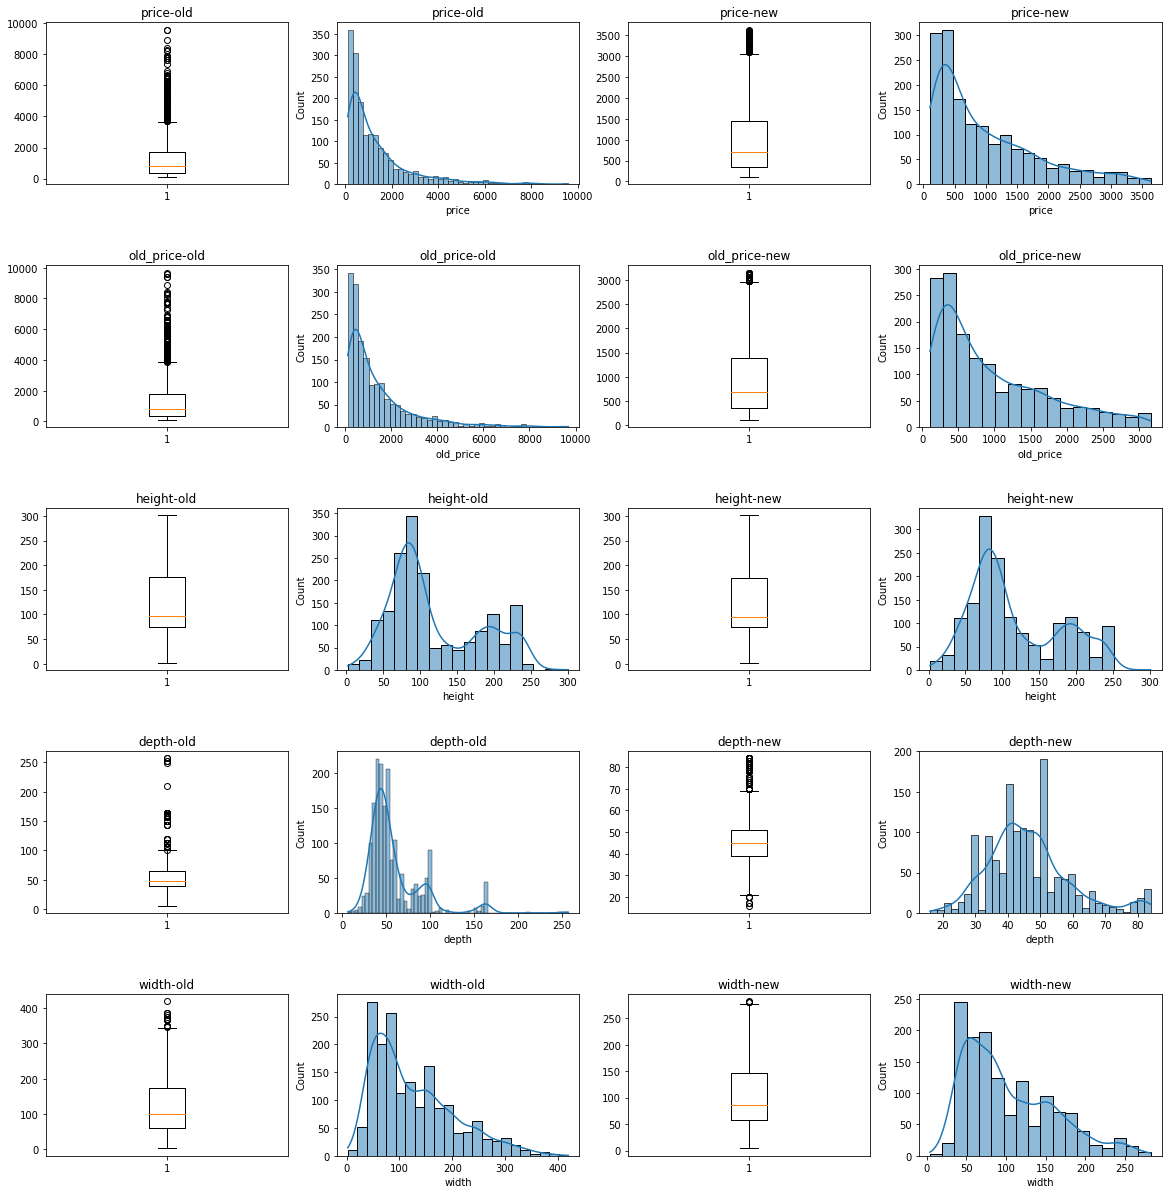

In [80]:
fig=plt.figure(figsize=(20,70))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.2,hspace=0.5)
testData=labelencoder.copy()
i=0
for col in columns:
  whiskermin=[]
  whiskermax=[]
  i=i+1 #increasing the number of the figure so that they find to the right place
  plt.subplot(16,4,i) # reserving the i-th place in the 9 times 4 subplot
  plt.boxplot(labelencoder[col])# creating the boxplot which is added to subplot
  plt.title(col+'-old')#setting the title of this plot in the center above the figure (= default)
  i=i+1#increasing the number for the next figure
  plt.subplot(16,4,i)#telling the subplot where to add the next figure
  sns.histplot(x=labelencoder[col],kde=True,legend=False)#create a histogram with a kde as figure
  plt.title(col+'-old')#setting title of the histogram
  i=i+1
  q25=testData[col].describe()['25%']
  q75=testData[col].describe()['75%']
  whiskermin=q25-1.5*(q75-q25)
  whiskermax=q75+1.5*(q75-q25)
  delIndex=testData[((testData[col]>=whiskermax)|(testData[col]<=whiskermin))].index
  testData=testData.drop(delIndex)
  plt.subplot(16,4,i)
  plt.boxplot(testData[col])
  plt.title(col+'-new')
  i=i+1#increasing the number for the next figure
  plt.subplot(16,4,i)#telling the subplot where to add the next figure
  sns.histplot(x=testData[col],kde=True)#create a histogram with a kde as figure
  plt.title(col+'-new')#setting title of the histogram
  fig.savefig('EliminationOutliers.jpg')#saving the figure in a file

>Our aim is to remove the outliers outside the whiskers-limits. Here it shows the before and after removing the outliers.

In [81]:
print('original number of rows: ',labelencoder.shape[0])
print('number of rows left: ',testData.shape[0])

original number of rows:  1748
number of rows left:  1365


In [132]:
labelencoder=labelencoder.drop(columns=['item_id','Number_for_Categories'])
labelencoder

category   price  old_price  \
4                            Bar furniture   225.0      225.0   
5                            Bar furniture   345.0      345.0   
6                            Bar furniture   129.0      129.0   
8                            Bar furniture   129.0      129.0   
10                           Bar furniture   149.0      149.0   
11                           Bar furniture   395.0      395.0   
12                           Bar furniture   395.0      395.0   
13                           Bar furniture   177.0      295.0   
14                           Bar furniture   345.0      345.0   
16                           Bar furniture   395.0      395.0   
18                           Bar furniture   595.0      595.0   
19                           Bar furniture   149.0      149.0   
21                           Bar furniture   175.0      175.0   
22                           Bar furniture   595.0      595.0   
24                           Bar furniture   345.0      345.0   
25                           Bar furniture   345.0      345.0   
27                           Bar furniture   695.0      695.0   
31                           Bar furniture   435.0      435.0   
35                           Bar furniture   395.0      395.0   
36                           Bar furniture   275.0      275.0   
40                           Bar furniture   745.0      745.0   
44                           Bar furniture   445.0      445.0   
46                           Bar furniture   175.0      175.0   
48                                    Beds   895.0      925.0   
50                                    Beds  2111.0     2205.0   
51                                    Beds   995.0      995.0   
61                                    Beds   575.0      575.0   
67                                    Beds   920.0      920.0   
70                                    Beds   575.0      575.0   
71                                    Beds  1495.0     1495.0   
74                                    Beds   670.0      670.0   
80                                    Beds  2600.5     2880.0   
86                                    Beds   399.0      399.0   
89                                    Beds  2290.0     2290.0   
91                                    Beds   570.0      570.0   
111                                   Beds  1495.0     1495.0   
113                                   Beds   620.0      620.0   
119                                   Beds  1470.0     1470.0   
121                                   Beds  1395.0     1395.0   
122                                   Beds   995.0      995.0   
123                                   Beds   220.0      220.0   
126                                   Beds  2185.0     2185.0   
129                                   Beds  1595.0     1595.0   
133                                   Beds  1848.0     2310.0   
134                                   Beds   200.0      200.0   
135                                   Beds  2307.0     2560.0   
136                                   Beds  1195.0     1195.0   
137                                   Beds  3339.0     3760.0   
141                                   Beds  1095.0     1095.0   
142                                   Beds  1245.0     1245.0   
144                                   Beds  1260.0     1260.0   
147                                   Beds  1445.0     1445.0   
149                                   Beds  1767.0     1885.0   
154                                   Beds  2905.0     3265.0   
157                                   Beds  1160.0     1450.0   
159                                   Beds   220.0      250.0   
167                                   Beds  2163.5     2360.0   
171                                   Beds  1995.0     1995.0   
172                                   Beds  2295.0     2295.0   
176                                   Beds  1611.0     1715.0   
177                                   Beds  3595.0     3595.0   
179 

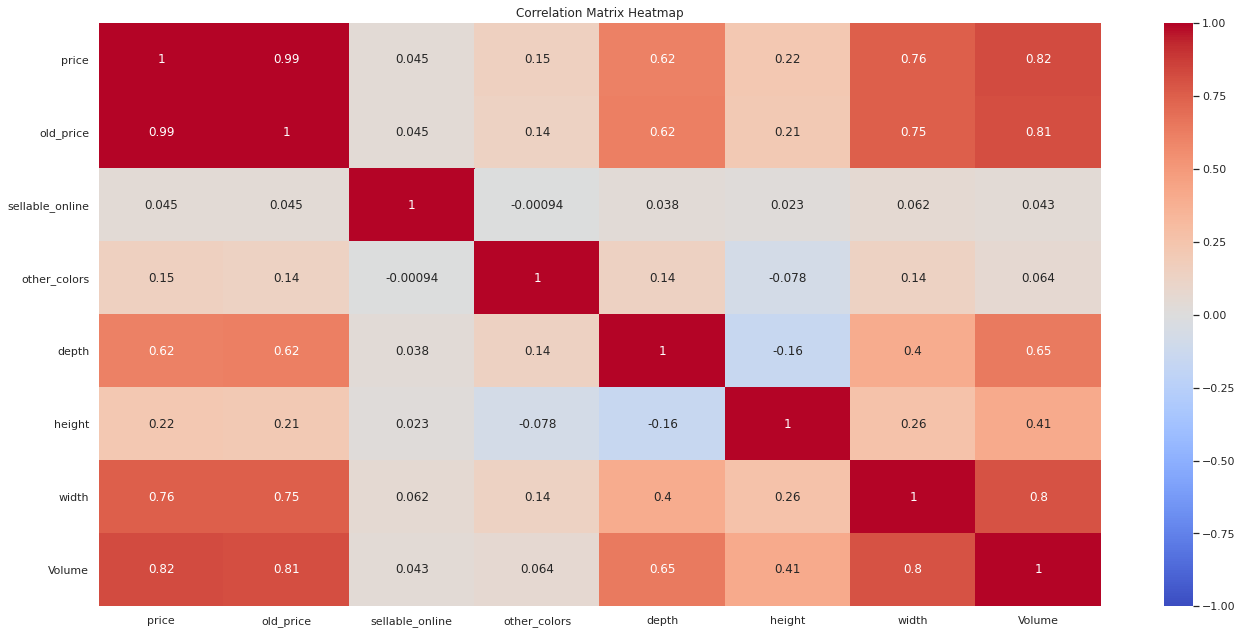

In [133]:
###Bivariate data analysis
# Example: Heatmap of the price data set
#adding a 'mask' results in a diagonal matrix without redundancy
plt.figure(figsize=(20,10))
#sns.heatmap(dfLE.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask)
sns.heatmap(labelencoder.corr(),annot=True,fmt='.2g',vmin=-1,vmax=1,center=0,cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

* Depth and height have a clear inverse correlation.
* Price has the postive correlation with width and depth.


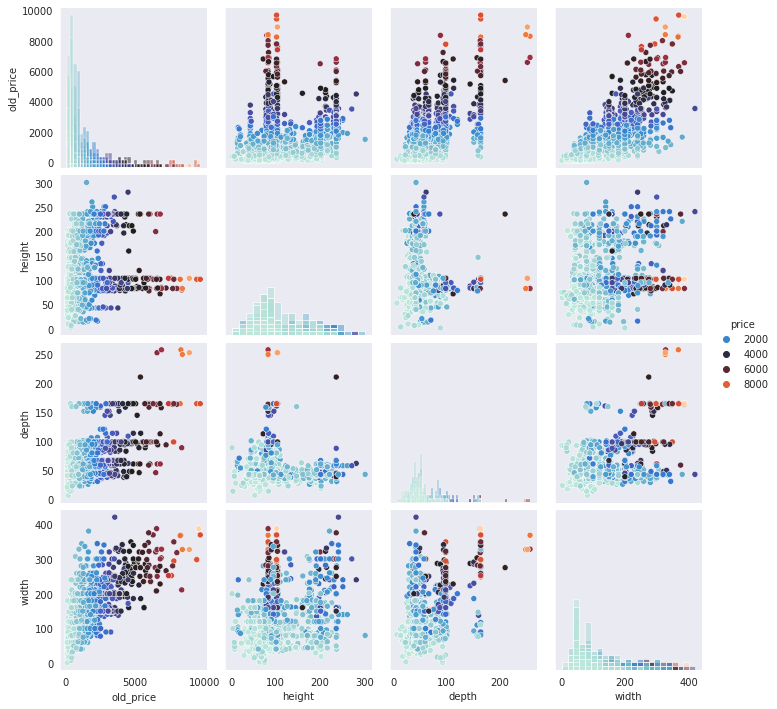

In [83]:
#scatter Plot
sns.set_style('dark') 
sns.pairplot(labelencoder.loc[:,['price','old_price','height','depth','width']],hue='price',diag_kind='hist',palette="icefire")

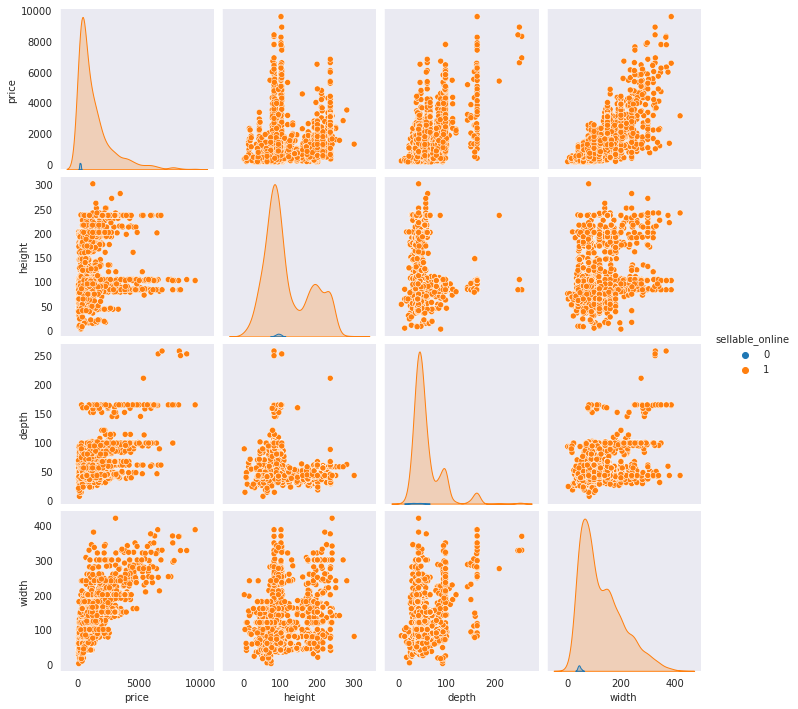

In [84]:

sns.set_style('dark') 
sns.pairplot(labelencoder.loc[:,['price','sellable_online','height','depth','width']],hue='sellable_online')

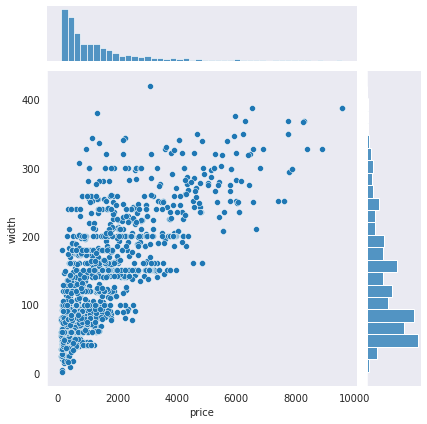

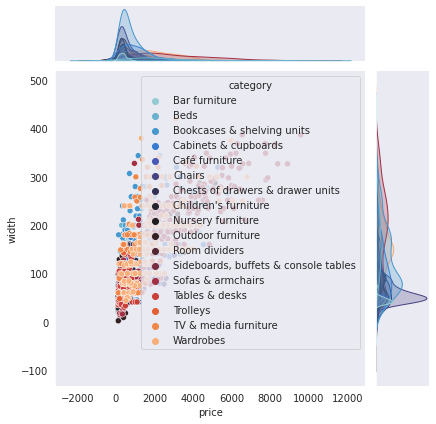

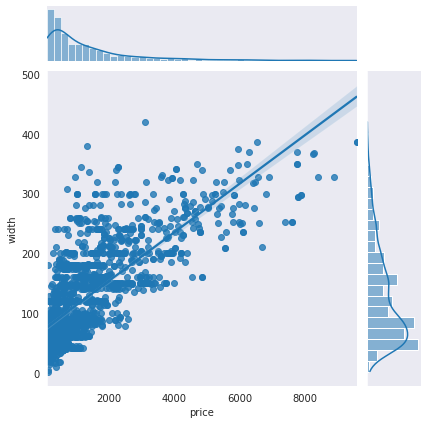

In [85]:
 #Example: Joint distribution plots# easiest version:
 sns.jointplot(data=labelencoder,x='price',y='width')
 # adding hue='Life_expectancy' with palette="icefire"
 sns.jointplot(data=labelencoder,x='price',y='width',hue='category',palette="icefire")
 # adding some automatic kernel density estimation and regression
 sns.jointplot(data=labelencoder,x='price',y='width',kind='reg')

###Plotting category dependencies

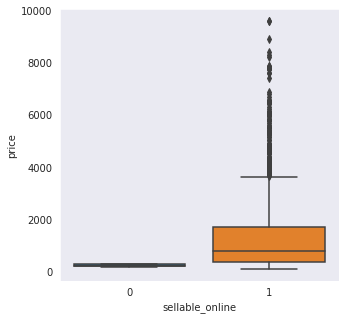

In [86]:
# Example: Example of catplot, comparing the distributions for life expectancy based on the factor 'Developed'
plt.figure(figsize=(5,5))
sns.boxplot(data=labelencoder,x="sellable_online",y="price")

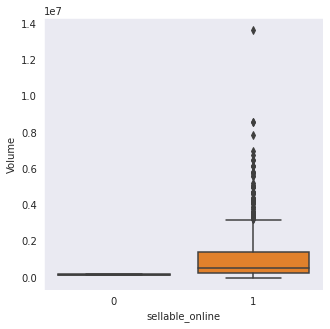

In [87]:
plt.figure(figsize=(5,5))
sns.boxplot(data=labelencoder,x="sellable_online",y="Volume")

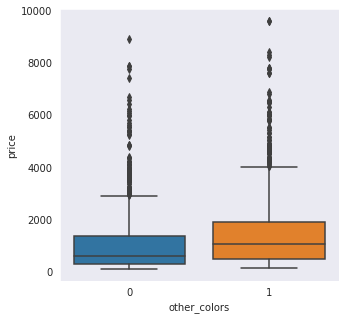

In [88]:
plt.figure(figsize=(5,5))
sns.boxplot(data=labelencoder,x="other_colors",y="price")

##2.4 Statistically relevant differences, t-test

In [90]:
#comparing the difference in the average of life-expectancy between developed and developing countries:
print('Average price of Bar furniture             : ',labelencoder.loc[labelencoder.category=='Bar furniture','price'].mean())
print('Average price of Beds                      : ',labelencoder.loc[labelencoder.category=='Beds','price'].mean())
print('Average price of Bookcases & shelving units: ',labelencoder.loc[labelencoder.category=='Bookcases & shelving units','price'].mean())
print('Average price of Cabinets & cupboards      : ',labelencoder.loc[labelencoder.category=='Cabinets & cupboards','price'].mean())
print('Average price of Café furniture            : ',labelencoder.loc[labelencoder.category=='Café furniture','price'].mean())
print('Average price of Chairs                    : ',labelencoder.loc[labelencoder.category=='Chairs','price'].mean())
print('Average price of Chests of drawers & drawer units: ',labelencoder.loc[labelencoder.category=='Chests of drawers & drawer units','price'].mean())
print('Average price of Nursery furniture         : ',labelencoder.loc[labelencoder.category=='Nursery furniture','price'].mean())

print('Average price of Outdoor furniture         : ',labelencoder.loc[labelencoder.category=='Outdoor furniture','price'].mean())
print('Average price of Room dividers             : ',labelencoder.loc[labelencoder.category=='Room dividers','price'].mean())
print('Average price of Sideboards, buffets & console tables: ',labelencoder.loc[labelencoder.category=='Sideboards, buffets & console tables','price'].mean())
print('Average price of Cabinets & cupboards      : ',labelencoder.loc[labelencoder.category=='Cabinets & cupboards','price'].mean())
print('Average price of Sofas & armchairs         : ',labelencoder.loc[labelencoder.category=='Sofas & armchairs','price'].mean())
print('Average price of TV & media furniture      : ',labelencoder.loc[labelencoder.category=='TV & media furniture','price'].mean())
print('Average price of Tables & desks            : ',labelencoder.loc[labelencoder.category=='Tables & desks','price'].mean())
print('Average price of Trolleys                  : ',labelencoder.loc[labelencoder.category=='Trolleys','price'].mean())


Average price of Bar furniture             :  350.1304347826087
Average price of Beds                      :  2612.987012987013
Average price of Bookcases & shelving units:  777.8795107033641
Average price of Cabinets & cupboards      :  1174.348404255319
Average price of Café furniture            :  332.61538461538464
Average price of Chairs                    :  621.1195652173913
Average price of Chests of drawers & drawer units:  639.1218487394958
Average price of Nursery furniture         :  450.09090909090907
Average price of Outdoor furniture         :  1285.92
Average price of Room dividers             :  817.5
Average price of Sideboards, buffets & console tables:  1156.55
Average price of Cabinets & cupboards      :  1174.348404255319
Average price of Sofas & armchairs         :  3036.1628959276018
Average price of TV & media furniture      :  1167.4886363636363
Average price of Tables & desks            :  612.2790697674419
Average price of Trolleys                  :  1181.4

In [91]:
# Example: running the t-test on life expectancy
sofas_armchair = labelencoder.loc[labelencoder.category=='Sofas & armchairs','price']
chair = labelencoder.loc[labelencoder.category=='Chairs','price']
stats.ttest_ind(sofas_armchair,chair,equal_var=False)

Ttest_indResult(statistic=16.436312984174247, pvalue=3.851300836519714e-42)

>The results for T-value is 16.8883 and p very close to 0. The p-value is therefore much less than 0.05and the test confirms a statistically significant difference.

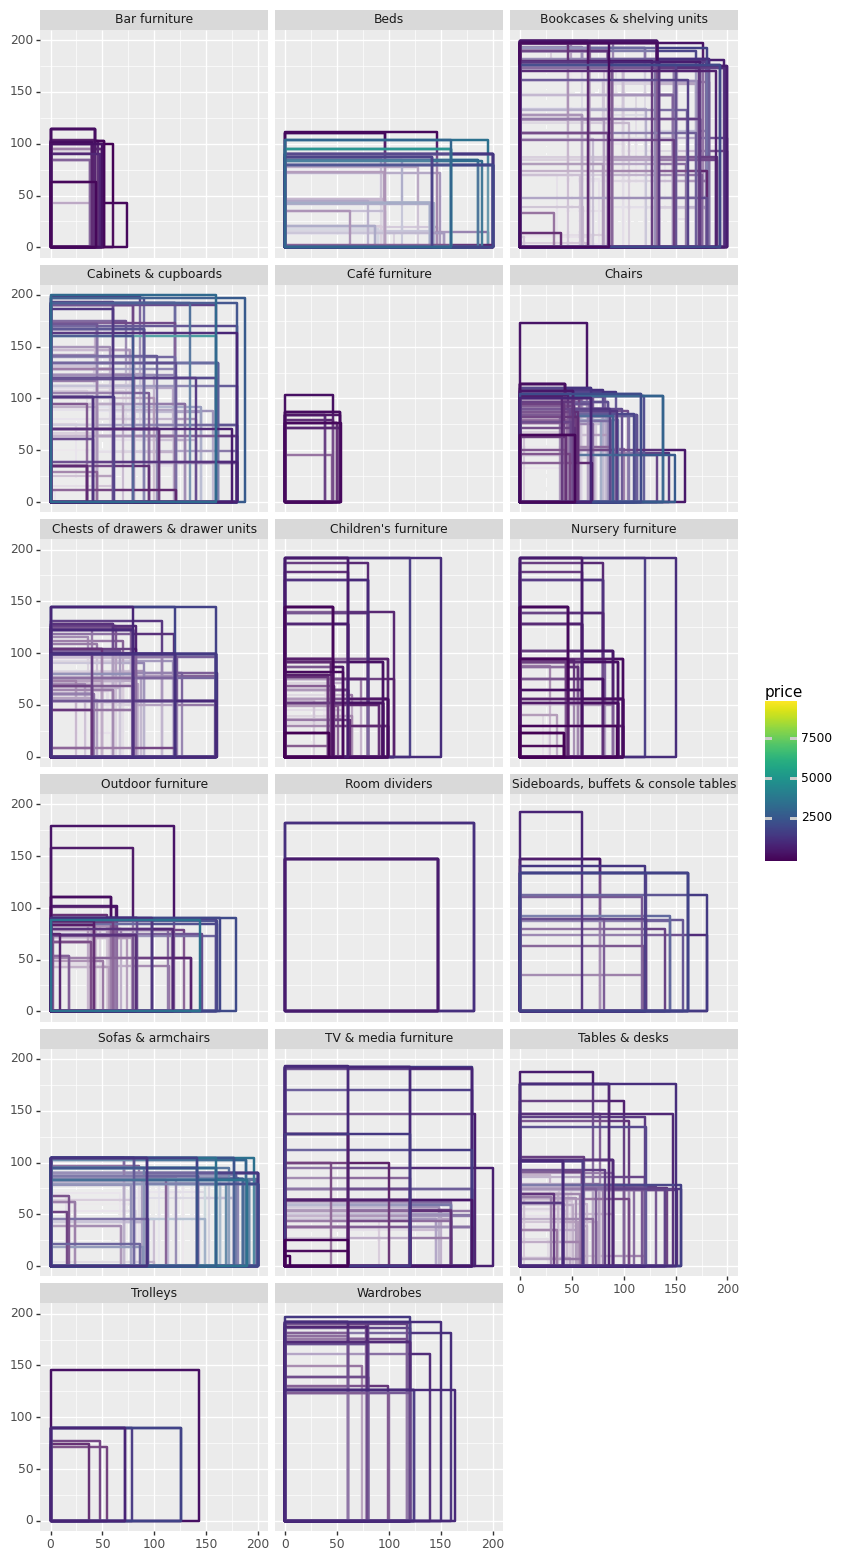

<ggplot: (8748204493133)>

In [92]:
ggplot(dFDropna, aes(xmin = 0, ymin = 0, xmax = 'width', ymax = 'height', colour = 'price', size='price',  fill = 'sellable_online')) + \
geom_rect(alpha = 0.05, fill = "#FFFFFF", size = 1) + \
scale_x_continuous(limits = (0, 200)) + \
scale_y_continuous(limits = (0, 200)) + \
facet_wrap('category', ncol = 3) + \
guides()+ \
coord_fixed() +\
theme(figure_size=(9, 9)) 

##3. Clustering
The purpose of clustering is to find new insights about the data in form of patterns or common characteristics. Groups or clusters are identified based on the distances of the data points to one another and/ or on their density.

In [93]:
Dfaggr=labelencoder.groupby(["category","short_description"],as_index=False).mean()
Dfaggr.head(5)

category                                  short_description  \
0  Bar furniture          Bar stool with backrest frame,        ...   
1  Bar furniture            Bar stool with backrest,          63 cm   
2  Bar furniture            Bar stool with backrest,          66 cm   
3  Bar furniture            Bar stool with backrest,          74 cm   
4  Bar furniture            Bar stool with backrest,          75 cm   

       item_id  price  old_price  sellable_online  other_colors  depth  \
0  40426138.00  395.0      395.0             1.00           0.0   51.0   
1  10122647.00  345.0      345.0             1.00           0.0   45.0   
2    272656.00  745.0      745.0             1.00           0.0   50.0   
3  30090550.80  463.0      463.0             1.00           0.2   48.4   
4  22892686.75  327.5      327.5             0.75           0.0   50.5   

   height  width  Number_for_Categories    Volume  
0  102.00  40.00                    0.0  208080.0  
1   91.00  40.00                    0.0  163800.0  
2   90.00  48.00                    0.0  216000.0  
3  101.80  41.60                    0.0  204809.2  
4  110.75  42.25                    0.0  237422.5

In [94]:
#Example: aggregation by group 'category',"short_description" with mean-values
Dfaggr=labelencoder.groupby(["category","short_description"],as_index=True).mean()
Dfaggr.head(7)
# Dfaggr.shape
# labelencoder

item_id  \
category      short_description                                                 
Bar furniture         Bar stool with backrest frame,         ...  40426138.00   
                      Bar stool with backrest,          63 cm     10122647.00   
                      Bar stool with backrest,          66 cm       272656.00   
                      Bar stool with backrest,          74 cm     30090550.80   
                      Bar stool with backrest,          75 cm     22892686.75   
                      Bar stool with backrest, foldable,     ...  60405670.00   
                      Bar stool with backrest, foldable,     ...  75405832.00   

                                                                  price  \
category      short_description                                           
Bar furniture         Bar stool with backrest frame,         ...  395.0   
                      Bar stool with backrest,          63 cm     345.0   
                      Bar stool with backrest,          66 cm     745.0   
                      Bar stool with backrest,          74 cm     463.0   
                      Bar stool with backrest,          75 cm     327.5   
                      Bar stool with backrest, foldable,     ...  129.0   
                      Bar stool with backrest, foldable,     ...  149.0   

                                                                  old_price  \
category      short_description                                               
Bar furniture         Bar stool with backrest frame,         ...      395.0   
                      Bar stool with backrest,          63 cm         345.0   
                      Bar stool with backrest,          66 cm         745.0   
                      Bar stool with backrest,          74 cm         463.0   
                      Bar stool with backrest,          75 cm         327.5   
                      Bar stool with backrest, foldable,     ...      129.0   
                      Bar stool with backrest, foldable,     ...      149.0   

                                                                  sellable_online  \
category      short_description                                                     
Bar furniture         Bar stool with backrest frame,         ...             1.00   
                      Bar stool with backrest,          63 cm                1.00   
                      Bar stool with backrest,          66 cm                1.00   
                      Bar stool with backrest,          74 cm                1.00   
                      Bar stool with backrest,          75 cm                0.75   
                      Bar stool with backrest, foldable,     ...             1.00   
                      Bar stool with backrest, foldable,     ...             1.00   

                                                                  other_colors  \
category      short_description                                                  
Bar furniture         Bar stool with backrest frame,         ...           0.0   
                      Bar stool with backrest,          63 cm              0.0   
                      Bar stool with backrest,          66 cm              0.0   
                      Bar stool with backrest,          74 cm              0.2   
                      Bar stool with backrest,          75 cm              0.0   
                      Bar stool with backrest, foldable,     ...           0.0   
                      Bar stool with backrest, foldable,     ...           0.0   

                                                                  depth  \
category      short_description                                           
Bar furniture         Bar stool with backrest frame,         ...   51.0   
                      Bar stool with backrest,          63 cm      45.0   
                      Bar stool with backrest,          66 cm      50.0   
                      Bar stool with backrest,          74 cm      48.4 

In [95]:
labelencoder.shape

(1748, 12)

In [96]:
# Removing the column 'Developed' from the data to be clustered
dfCluster2=Dfaggr.copy()
dfCluster2=dfCluster2.drop(columns='sellable_online')
# dfCluster2=dfCluster2.drop(columns='Number_for_Categories')
dfCluster2.head(3)

item_id  \
category      short_description                                                
Bar furniture         Bar stool with backrest frame,         ...  40426138.0   
                      Bar stool with backrest,          63 cm     10122647.0   
                      Bar stool with backrest,          66 cm       272656.0   

                                                                  price  \
category      short_description                                           
Bar furniture         Bar stool with backrest frame,         ...  395.0   
                      Bar stool with backrest,          63 cm     345.0   
                      Bar stool with backrest,          66 cm     745.0   

                                                                  old_price  \
category      short_description                                               
Bar furniture         Bar stool with backrest frame,         ...      395.0   
                      Bar stool with backrest,          63 cm         345.0   
                      Bar stool with backrest,          66 cm         745.0   

                                                                  other_colors  \
category      short_description                                                  
Bar furniture         Bar stool with backrest frame,         ...           0.0   
                      Bar stool with backrest,          63 cm              0.0   
                      Bar stool with backrest,          66 cm              0.0   

                                                                  depth  \
category      short_description                                           
Bar furniture         Bar stool with backrest frame,         ...   51.0   
                      Bar stool with backrest,          63 cm      45.0   
                      Bar stool with backrest,          66 cm      50.0   

                                                                  height  \
category      short_description                                            
Bar furniture         Bar stool with backrest frame,         ...   102.0   
                      Bar stool with backrest,          63 cm       91.0   
                      Bar stool with backrest,          66 cm       90.0   

                                                                  width  \
category      short_description                                           
Bar furniture         Bar stool with backrest frame,         ...   40.0   
                      Bar stool with backrest,          63 cm      40.0   
                      Bar stool with backrest,          66 cm      48.0   

                                                                  Number_for_Categories  \
category      short_description                                                           
Bar furniture         Bar stool with backrest frame,         ...                    0.0   
                      Bar stool with backrest,          63 cm                       0.0   
                      Bar stool with backrest,          66 cm                       0.0   

                                                                    Volume  
category      short_description                                             
Bar furniture         Bar stool with backrest frame,         ...  208080.0  
                      Bar stool with backrest,          63 cm     163800.0  
                      Bar stool with backrest,          66 cm     216000.0

In [97]:
dfCluster2.dtypes

item_id                  float64
price                    float64
old_price                float64
other_colors             float64
depth                    float64
height                   float64
width                    float64
Number_for_Categories    float64
Volume                   float64
dtype: object

In [98]:
 #Standard-scaling, which turns dataframes into numpy.ndarrays were they need to be transformed back into dataframe
 sc=StandardScaler()
 dfCluster2sc=sc.fit_transform(dfCluster2)
 dfCluster2=DataFrame(dfCluster2sc,index=dfCluster2.index,columns=dfCluster2.columns)
 dfCluster2.head(2)

item_id  \
category      short_description                                              
Bar furniture         Bar stool with backrest frame,         ... -0.287645   
                      Bar stool with backrest,          63 cm    -1.379163   

                                                                     price  \
category      short_description                                              
Bar furniture         Bar stool with backrest frame,         ... -0.600649   
                      Bar stool with backrest,          63 cm    -0.643887   

                                                                  old_price  \
category      short_description                                               
Bar furniture         Bar stool with backrest frame,         ...  -0.619287   
                      Bar stool with backrest,          63 cm     -0.660834   

                                                                  other_colors  \
category      short_description                                                  
Bar furniture         Bar stool with backrest frame,         ...     -1.024875   
                      Bar stool with backrest,          63 cm        -1.024875   

                                                                     depth  \
category      short_description                                              
Bar furniture         Bar stool with backrest frame,         ...  0.032482   
                      Bar stool with backrest,          63 cm    -0.215719   

                                                                    height  \
category      short_description                                              
Bar furniture         Bar stool with backrest frame,         ... -0.287003   
                      Bar stool with backrest,          63 cm    -0.462818   

                                                                     width  \
category      short_description                                              
Bar furniture         Bar stool with backrest frame,         ... -1.116637   
                      Bar stool with backrest,          63 cm    -1.116637   

                                                                  Number_for_Categories  \
category      short_description                                                           
Bar furniture         Bar stool with backrest frame,         ...              -1.349964   
                      Bar stool with backrest,          63 cm                 -1.349964   

                                                                    Volume  
category      short_description                                             
Bar furniture         Bar stool with backrest frame,         ... -0.633189  
                      Bar stool with backrest,          63 cm    -0.678585

In [99]:
#Example: create kmeans object with 2 clusters
kmeans_2f=KMeans(n_clusters=2)
# fit kmeans model with dfCluster2 data
kmeans_2f.fit(dfCluster2)

#  save the location of the centers of the clusters learned by kmeans object
center_2f=kmeans_2f.cluster_centers_
# save the labels of the clusters as DataFrame, using same index as in dfCluster2
y_2f=DataFrame(kmeans_2f.labels_,index=dfCluster2.index)

In [100]:
# Add the cluster-numbers to a column 'Cluster2' in dfLEA
Dfaggr['Cluster2']=y_2f
Dfaggr.head(5)

item_id  \
category      short_description                                                 
Bar furniture         Bar stool with backrest frame,         ...  40426138.00   
                      Bar stool with backrest,          63 cm     10122647.00   
                      Bar stool with backrest,          66 cm       272656.00   
                      Bar stool with backrest,          74 cm     30090550.80   
                      Bar stool with backrest,          75 cm     22892686.75   

                                                                  price  \
category      short_description                                           
Bar furniture         Bar stool with backrest frame,         ...  395.0   
                      Bar stool with backrest,          63 cm     345.0   
                      Bar stool with backrest,          66 cm     745.0   
                      Bar stool with backrest,          74 cm     463.0   
                      Bar stool with backrest,          75 cm     327.5   

                                                                  old_price  \
category      short_description                                               
Bar furniture         Bar stool with backrest frame,         ...      395.0   
                      Bar stool with backrest,          63 cm         345.0   
                      Bar stool with backrest,          66 cm         745.0   
                      Bar stool with backrest,          74 cm         463.0   
                      Bar stool with backrest,          75 cm         327.5   

                                                                  sellable_online  \
category      short_description                                                     
Bar furniture         Bar stool with backrest frame,         ...             1.00   
                      Bar stool with backrest,          63 cm                1.00   
                      Bar stool with backrest,          66 cm                1.00   
                      Bar stool with backrest,          74 cm                1.00   
                      Bar stool with backrest,          75 cm                0.75   

                                                                  other_colors  \
category      short_description                                                  
Bar furniture         Bar stool with backrest frame,         ...           0.0   
                      Bar stool with backrest,          63 cm              0.0   
                      Bar stool with backrest,          66 cm              0.0   
                      Bar stool with backrest,          74 cm              0.2   
                      Bar stool with backrest,          75 cm              0.0   

                                                                  depth  \
category      short_description                                           
Bar furniture         Bar stool with backrest frame,         ...   51.0   
                      Bar stool with backrest,          63 cm      45.0   
                      Bar stool with backrest,          66 cm      50.0   
                      Bar stool with backrest,          74 cm      48.4   
                      Bar stool with backrest,          75 cm      50.5   

                                                                  height  \
category      short_description                                            
Bar furniture         Bar stool with backrest frame,         ...  102.00   
                      Bar stool with backrest,          63 cm      91.00   
                      Bar stool with backrest,          66 cm      90.00   
                      Bar stool with backrest,          74 cm     101.80   
                      Bar stool with backrest,          75 cm     110.75   

                                                                  width  \
category      short_description                                           
Bar furniture         Bar stool with backr

In [101]:
# Comparing value_counts
print('Value counts of Selling_online: ',Dfaggr.sellable_online.value_counts())
print('\n Value counts of Cluster2-clusters: ',Dfaggr.Cluster2.value_counts())

Value counts of Selling_online:  1.000000    1211
0.500000       3
0.750000       2
0.666667       1
Name: sellable_online, dtype: int64

 Value counts of Cluster2-clusters:  1    990
0    227
Name: Cluster2, dtype: int64


In [102]:
Dfaggr[(Dfaggr['Cluster2']==0)&(Dfaggr['sellable_online']==0)]



Empty DataFrame
Columns: [item_id, price, old_price, sellable_online, other_colors, depth, height, width, Number_for_Categories, Volume, Cluster2]
Index: []

> There is no online sellable_online items in cluster 0.

In [103]:
Dfaggr[(Dfaggr['Cluster2']==1)&(Dfaggr['sellable_online']==0)]

Empty DataFrame
Columns: [item_id, price, old_price, sellable_online, other_colors, depth, height, width, Number_for_Categories, Volume, Cluster2]
Index: []

There is no online sellable_online items in cluster 1

In [104]:
Dfaggr[(Dfaggr['Cluster2']==0)&(Dfaggr['sellable_online']==1)]

item_id  \
category                             short_description                                                  
Beds                                         2-seat modular sofa w 2 sofa-beds           2.927772e+07   
                                             2-seat modular sofa with sofa-bed           5.927765e+07   
                                             2-seat sofa-bed                             4.327353e+07   
                                             2-seat sofa-bed section                     2.678583e+07   
                                             3-seat sofa-bed                             5.280247e+07   
                                             Corner sofa-bed                             4.418430e+07   
                                             Corner sofa-bed, 4-seat                     9.278569e+06   
                                             Corner sofa-bed, 5-seat                     3.261483e+07   
                                             Corner sofa-bed, 6-seat                     2.927764e+07   
                                             Modular corner sofa 3-seat+sofa-bed         9.278003e+06   
                                             Sofa-bed with side table,          120 cm   8.930075e+07   
                                             Sofa-bed with side table,          90 cm    2.929745e+07   
                                             Sofa-bed with triple cushion                9.306386e+06   
                                             Sofa-bed,          90 cm                    5.929748e+07   
                                             Three-seat sofa-bed                         8.924076e+07   
Bookcases & shelving units                   3 sections/cabinet/shelves,          25...  6.924821e+07   
                                             3 sections/shelves,          259x50x226 cm  8.924854e+07   
                                             4 sections/shelves,          307x50x171 cm  4.904698e+07   
                                             4 sections/shelves,          344x30x226 cm  9.248544e+06   
                                             4 sections/shelves/cabinet,          34...  2.924821e+07   
                                             Bookcase,          200x30x237 cm            6.902047e+07   
                                             Bookcase,          215/135x28x237 cm        6.915585e+07   
                                             Bookcase,          229x197 cm               1.923115e+07   
                                             Cabinet combination for TV,          21...  9.928684e+07   
                                             Cabinet combination for TV,          30...  9.928686e+07   
                                             Cabinet combination with legs,         ...  5.428668e+07   
                                             Desk combination,          147x147x159 cm   4.913362e+07   
                                             Shelving unit w cabinets/drawers,      ...  8.932372e+07   
                                             Shelving unit w cabinets/drawers,      ...  5.930348e+07   
                                             Shelving unit w tbl/cabinets/shlvs,    ...  6.930475e+07   
                                             Shelving unit with shelves/rails,      ...  6.928802e+07   
                                             Shelving unit,          234x55x190 cm       4.927271e+07   
                                             Shelving unit,          254x40x190 cm       3.428833e+07   
                                             Shelving unit,          254x55x190 cm       9.930397e+07   
                                             Storage combination w doors/drawers,   ...  9.384051e+06   
                                             Storage combination w glass doors,     ...  7.926593e+07   
                                             Storage combination with doors,        ...  1.904644e+07   

In [105]:
Dfaggr[(Dfaggr['Cluster2']==1)&(Dfaggr['sellable_online']==1)]

item_id  \
category                             short_description                                                  
Bar furniture                                Bar stool with backrest frame,         ...  4.042614e+07   
                                             Bar stool with backrest,          63 cm     1.012265e+07   
                                             Bar stool with backrest,          66 cm     2.726560e+05   
                                             Bar stool with backrest,          74 cm     3.009055e+07   
                                             Bar stool with backrest, foldable,     ...  6.040567e+07   
                                             Bar stool with backrest, foldable,     ...  7.540583e+07   
                                             Bar stool with backrest, in/outdoor,   ...  5.042033e+07   
                                             Bar stool,          63 cm                   3.033032e+07   
                                             Bar stool,          76 cm                   4.026372e+07   
                                             Bar stool,          77 cm                   3.013566e+07   
                                             Wall-mounted drop-leaf table,          ...  3.018050e+07   
Beds                                         Armchair-bed                                5.046895e+07   
                                             Bed frame w storage and headboard,     ...  9.241420e+06   
                                             Bed frame w storage and headboard,     ...  4.927834e+07   
                                             Bed frame w storage+slatted bedbase,   ...  2.929196e+07   
                                             Bed frame with 10 doors,          143x2...  8.930545e+07   
                                             Bed frame with 10 drawers,          140...  8.930291e+07   
                                             Bed frame with 2 door+3 drawers,       ...  9.930298e+07   
                                             Bed frame with 2 drawers,          142x...  9.930292e+07   
                                             Bed frame with 2 storage boxes,        ...  6.924110e+07   
                                             Bed frame with 3 storage boxes,        ...  8.938607e+07   
                                             Bed frame with 4 doors+6 drawers,      ...  5.930292e+07   
                                             Bed frame with 4 drawers,          140x...  8.932646e+07   
                                             Bed frame with 4 drawers,          142x...  9.302913e+06   
                                             Bed frame with 4 storage boxes,        ...  2.924116e+07   
                                             Bed frame with 6 doors+12 drawers,     ...  9.324284e+06   
                                             Bed frame with storage,          140x20...  4.356862e+07   
                                             Bed frame with storage,          140x24...  1.930292e+07   
                                             Bed frame with storage,          90x200 cm  2.040069e+07   
                                             Bed frame, high, w 2 storage boxes,    ...  1.917596e+07   
                                             Bed frame, high, w 2 storage boxes,    ...  7.901299e+07   
                                             Day-bed frame with 2 drawers,          ...  2.287050e+05   
                                             Day-bed frame with 3 drawers,          ...  7.536080e+07   
                                             Day-bed w 2 drawers/2 mattresses,      ...  1.912993e+07   
                                             Day-bed w 3 drawers/2 mattresses,      ...  9.186126e+06   
                                             Desk top                                    2.024990e+07   
                                             Desk top,          95x45 cm                 4.041141e+07   

In [107]:
# Resetting the variable dfLEA to original aggregated variable without cluster2-information
Dfaggr=labelencoder.groupby(['category','short_description']).mean()
# Removing the column 'Life_expectancy' from the data to be clustered
dfClusterN=Dfaggr.copy()
# dfClusterN=dfClusterN.drop(columns='Unnamed: 0')
dfClusterN=dfClusterN.drop(columns='item_id')
dfClusterN=dfClusterN.drop(columns='Number_for_Categories')
dfClusterN=dfClusterN.drop(columns='sellable_online')
# dfClusterN

In [108]:
# Standard-scaling, which turns dataframes into numpy.ndarrays were they need to be transformed back into dataframes
sc=StandardScaler()
dfClusterNsc=sc.fit_transform(dfClusterN)
dfClusterN=DataFrame(dfClusterNsc,index=dfClusterN.index,columns=dfClusterN.columns)
dfClusterN.head(3)

price  \
category      short_description                                              
Bar furniture         Bar stool with backrest frame,         ... -0.600649   
                      Bar stool with backrest,          63 cm    -0.643887   
                      Bar stool with backrest,          66 cm    -0.297985   

                                                                  old_price  \
category      short_description                                               
Bar furniture         Bar stool with backrest frame,         ...  -0.619287   
                      Bar stool with backrest,          63 cm     -0.660834   
                      Bar stool with backrest,          66 cm     -0.328458   

                                                                  other_colors  \
category      short_description                                                  
Bar furniture         Bar stool with backrest frame,         ...     -1.024875   
                      Bar stool with backrest,          63 cm        -1.024875   
                      Bar stool with backrest,          66 cm        -1.024875   

                                                                     depth  \
category      short_description                                              
Bar furniture         Bar stool with backrest frame,         ...  0.032482   
                      Bar stool with backrest,          63 cm    -0.215719   
                      Bar stool with backrest,          66 cm    -0.008885   

                                                                    height  \
category      short_description                                              
Bar furniture         Bar stool with backrest frame,         ... -0.287003   
                      Bar stool with backrest,          63 cm    -0.462818   
                      Bar stool with backrest,          66 cm    -0.478802   

                                                                     width  \
category      short_description                                              
Bar furniture         Bar stool with backrest frame,         ... -1.116637   
                      Bar stool with backrest,          63 cm    -1.116637   
                      Bar stool with backrest,          66 cm    -1.008905   

                                                                    Volume  
category      short_description                                             
Bar furniture         Bar stool with backrest frame,         ... -0.633189  
                      Bar stool with backrest,          63 cm    -0.678585  
                      Bar stool with backrest,          66 cm    -0.625069

###3.1 Identifying the number of clusters

In [109]:
# The following code defines first some parameters and then iterates in a for loop where the data is
# clustered from 1 to 15 clusters. The inertia value is added to the SSE-array, one for each clustering
# SSE stands for 'Sum of Squared Errors', see: https://hlab.stanford.edu/brian/error_sum_of_squares.html

kmeans_kwargs={"init":"random","n_init":10,"max_iter":300,"random_state":42,}
# A list holds the SSE values for each k
sse=[]
for k in range(1,15):
  kmeans=KMeans(n_clusters=k,**kmeans_kwargs)
  kmeans.fit(dfClusterN)
  sse.append(kmeans.inertia_)

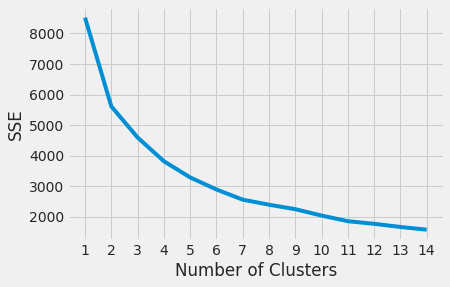

In [110]:
 #Plots the value for SSE found
 plt.style.use("fivethirtyeight")
 plt.plot(range(1,15),sse)
 plt.xticks(range(1,15))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [111]:
# create kmeans object with 3 clusters
kmeans_3f=KMeans(init='random',n_clusters=3,n_init=10,max_iter=300,random_state=42)
# fit kmeans object to data
kmeans_3f.fit(dfClusterN)
# save the location of the centers of the clusters learned by kmeans object
center_3f=kmeans_3f.cluster_centers_

# save Labels of each point
y_3f=DataFrame(kmeans_3f.labels_,index=dfClusterN.index)

# Adding the labels to the overview table
Dfaggr['Cluster3']=y_3f
y_3f.value_counts()

2    521
0    497
1    199
dtype: int64

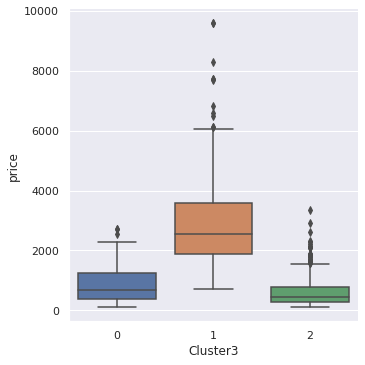

In [112]:
#Example: Comparing the distributions for price based on clustering
sns.set_theme()
#reset to default
#'fivethirtyeight'
sns.catplot(data=Dfaggr, x='Cluster3',y="price",kind="box")

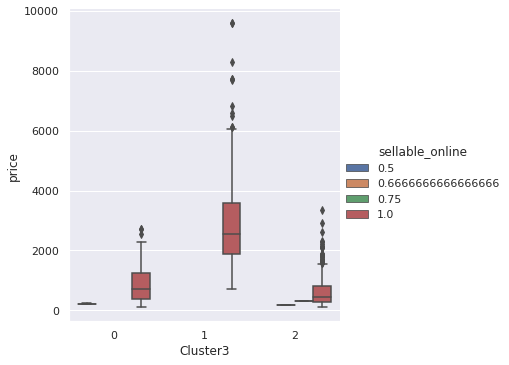

In [113]:
sns.catplot(data=Dfaggr,x="Cluster3",y="price",kind="box",hue='sellable_online')

In [114]:
# DFdim_red=DFdim_red.groupby(["category","short_description"],as_index=False)
# DFdim_red.head(5)

NameError: ignored

###3.2 Clustering with k-means method

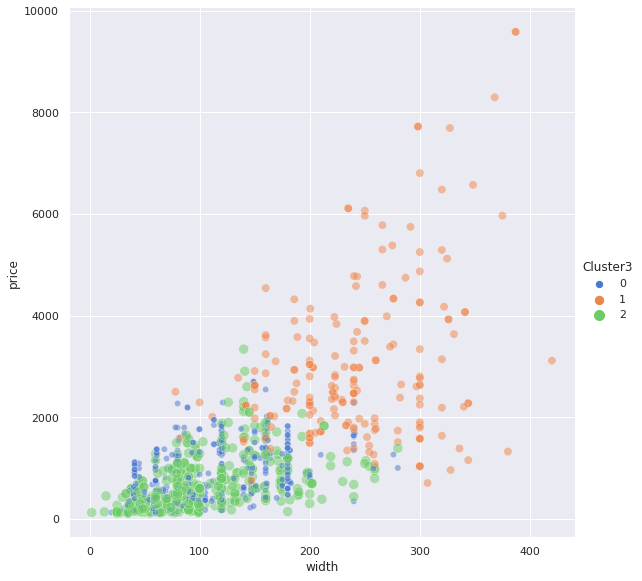

In [115]:
sns.relplot(x="width", y="price", hue="Cluster3",size="Cluster3", sizes=(40,100), alpha=.5, palette="muted", height=8, data = Dfaggr)
# sns.relplot(x="depth", y="price", sizes=(40,100), alpha=.5, palette="muted", height=8, data = labelencoder[labelencoder['Number_for_Categories']==1])

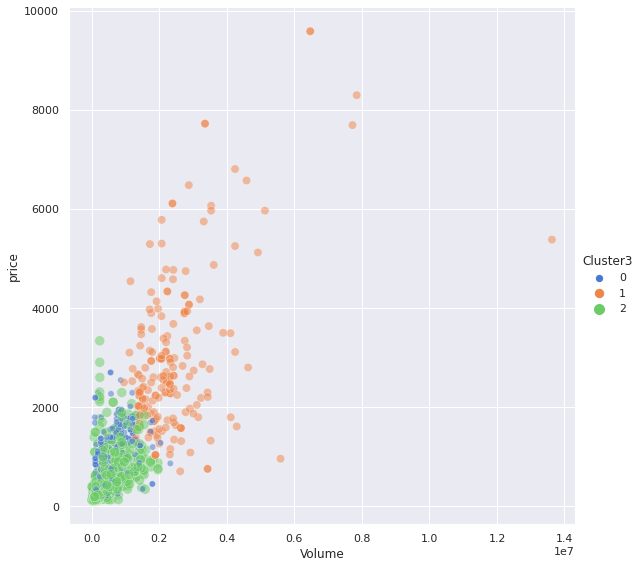

In [116]:
sns.relplot(x="Volume", y="price", hue="Cluster3",size="Cluster3", sizes=(40,100), alpha=.5, palette="muted", height=8, data = Dfaggr[Dfaggr['sellable_online']==1])


In [ ]:
# sns.relplot(x="width", y="price", hue="Cluster3",size="Cluster3", sizes=(40,100), alpha=.5, palette="muted", height=8, data = Dfaggr[Dfaggr['sellable_online']==0])


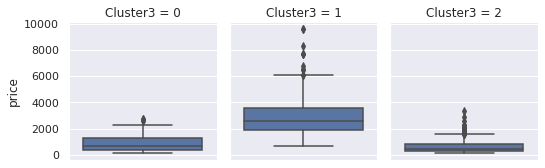

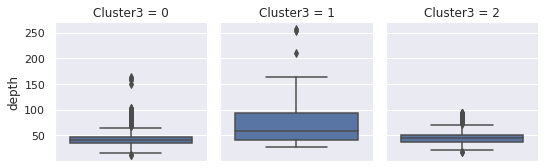

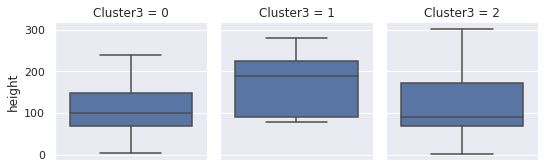

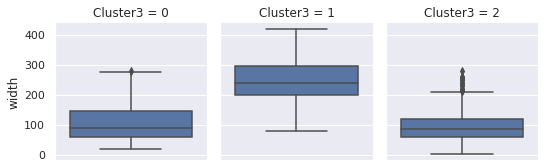

In [117]:
columns=['price','depth','height','width']
sns.set_theme()

for col in columns:
  sns.catplot(y=col,col="Cluster3",col_wrap=3,data=Dfaggr,kind="box",height=2.5,aspect=1)

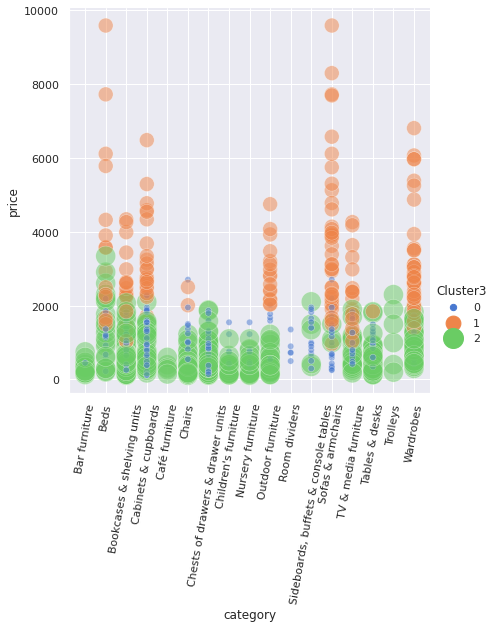

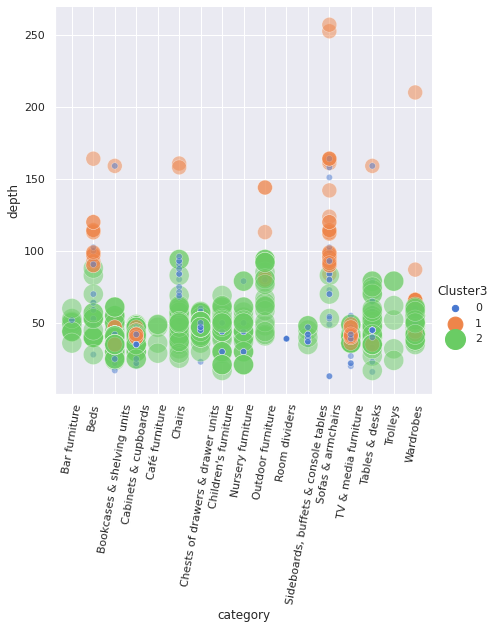

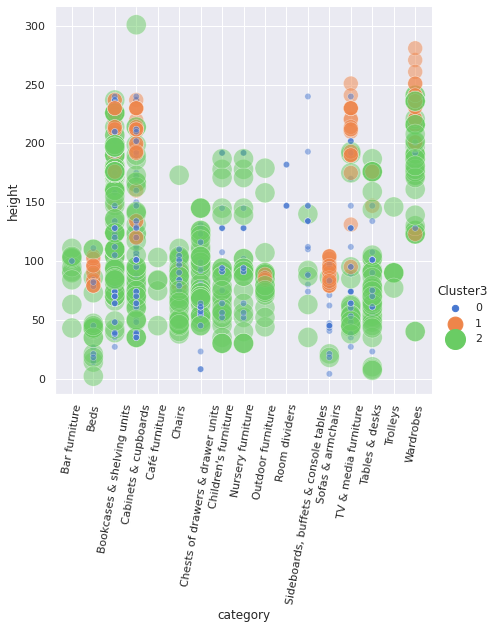

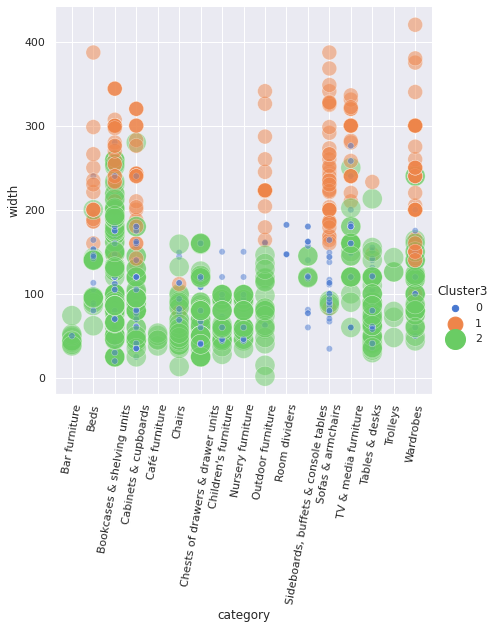

In [118]:
columns=['price','depth','height','width']
# plt.figure(figsize=(100,10))
for col in columns:
  sns.relplot(x="category",y=col,hue="Cluster3",size="Cluster3",sizes=(40,400),alpha=.5,palette="muted",height=6,data=Dfaggr)
  plt.xticks(rotation=80);

#4. Dimensionality reduction


In [119]:
X=Dfaggr.loc[:,['price','depth','height','width']]
X.shape
# X.head(3)

(1217, 4)

In [120]:
# PCA is sensitive to different scaling in the data. We therefore need to use a scaler first.
sc=StandardScaler()
X_std=sc.fit_transform(X)
# defining PCA
pca=PCA(n_components=2)
# carrying out the dimension reduction from d=15 to k=2 dimensions
X_pca=pca.fit_transform(X_std)

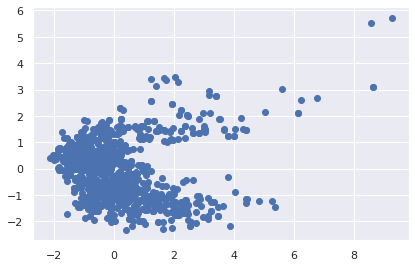

In [121]:
plt.scatter(X_pca[:,0],X_pca[:,1])

In [122]:
# Preparing a dataframe that can be scatter plottet with coloring the clusters
dfX2=DataFrame(X_pca,index=X.index,columns=['x','y'])
dfX2.head(3)

x  \
category      short_description                                              
Bar furniture         Bar stool with backrest frame,         ... -1.111122   
                      Bar stool with backrest,          63 cm    -1.287197   
                      Bar stool with backrest,          66 cm    -0.922029   

                                                                         y  
category      short_description                                             
Bar furniture         Bar stool with backrest frame,         ...  0.366533  
                      Bar stool with backrest,          63 cm     0.340981  
                      Bar stool with backrest,          66 cm     0.488176

In [123]:
#Adding the columns for the clusters Cluster2 and Cluster3
dfX2.loc[:,'Cluster2']=y_2f
dfX2.loc[:,'Cluster3']=Dfaggr['Cluster3']
dfX2.shape

(1217, 4)

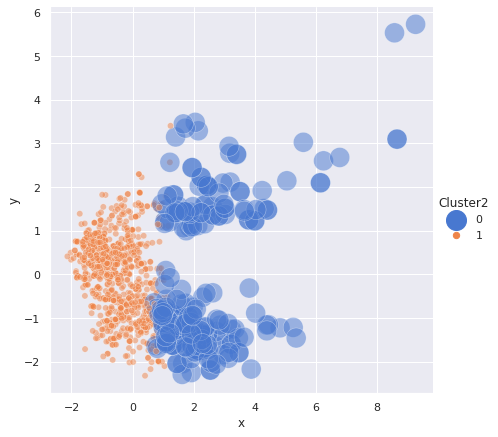

In [124]:
#Example: scatter plot two clusters in the reduced dimension of the dataset
sns.relplot(x="x",y="y",hue="Cluster2",size="Cluster2",sizes=(40,400),alpha=.5,palette="muted",height=6,data=dfX2)

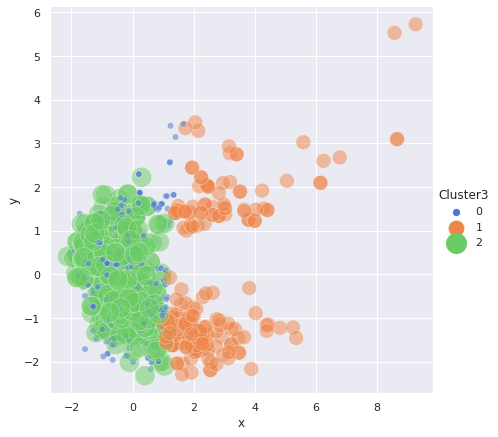

In [125]:
#Example: scatter plot three clusters in the reduced dimension of the dataset
sns.relplot(x="x",y="y",hue="Cluster3",size="Cluster3",sizes=(40,400),alpha=.5,palette="muted",height=6,data=dfX2)

Text(0, 0.5, 'y')

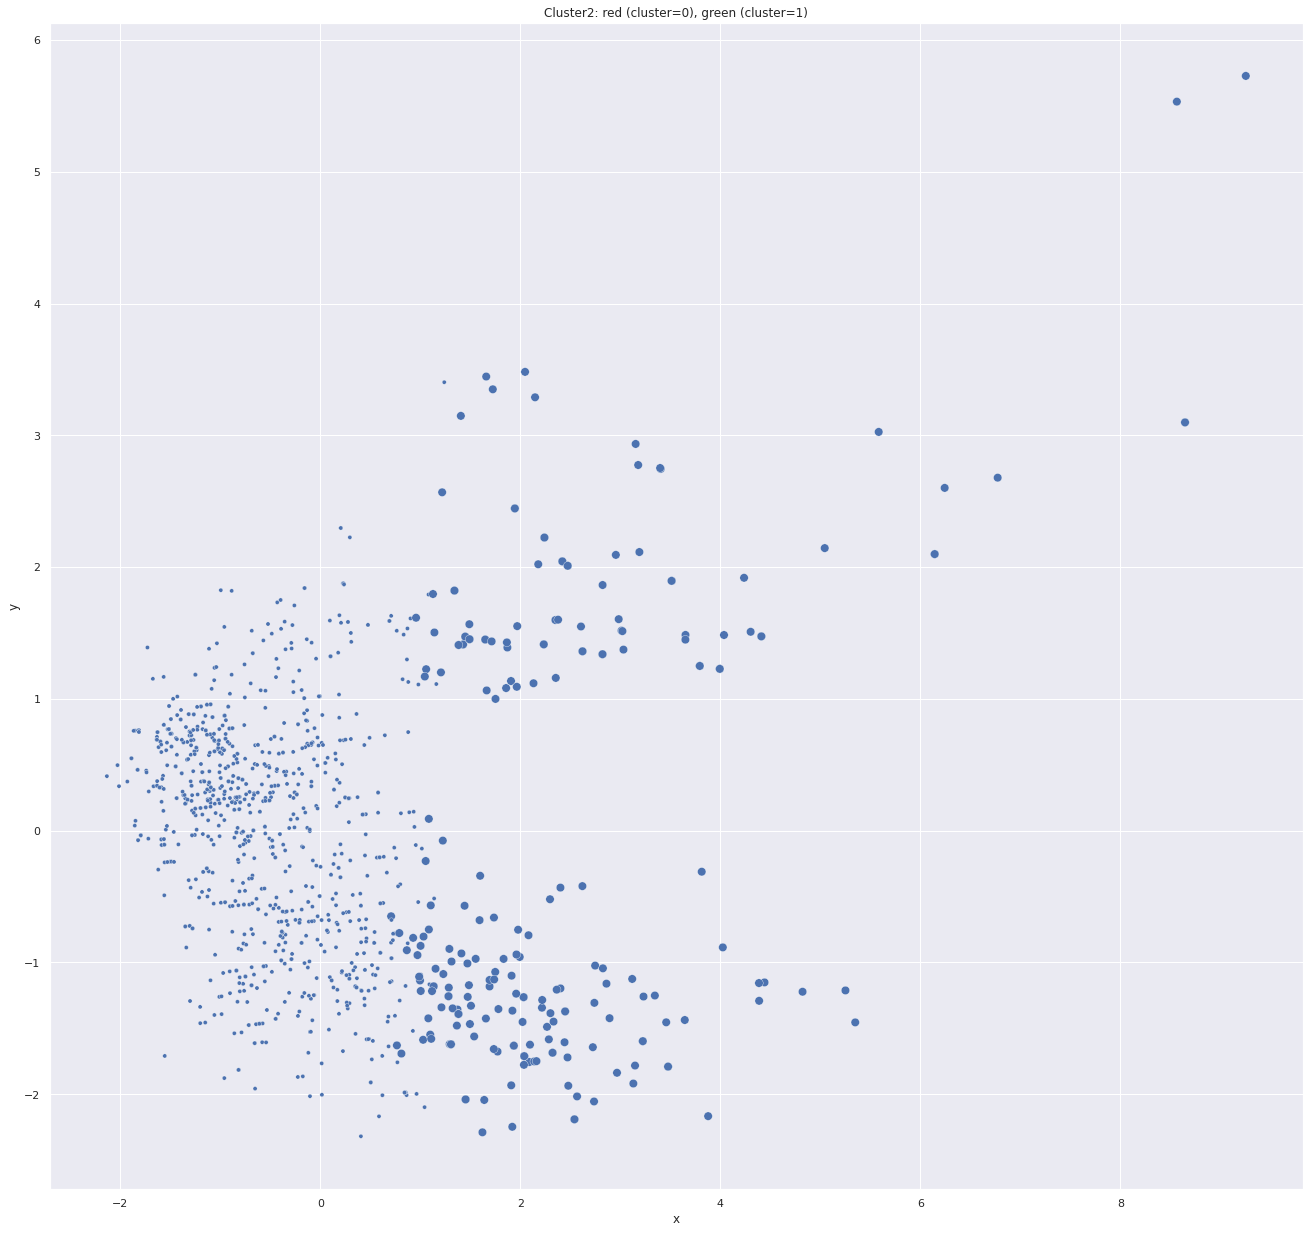

In [126]:
# Example: Labeling the countries belonging to cluster 0 and 1 in Cluster2
plt.figure(figsize=(20,20))
p1=sns.scatterplot('x',# Horizontal axis
                   'y',# Vertical axis
                   data=dfX2,# Data source
                   size='Cluster2',
                   legend=False)
# for line in range(0,dfX2.shape[0]):
#   c=dfX2.iloc[line,2]
#   if c==0:
#     p1.text(dfX2.iloc[line,0]+0.01,dfX2.iloc[line,1],dfX2.index[line],horizontalalignment='left',size='medium',color='red',weight='semibold')
#   if c==1:
#     p1.text(dfX2.iloc[line,0]+0.01,dfX2.iloc[line,1],dfX2.index[line],horizontalalignment='left',size='medium',color='green',weight='semibold')
plt.title('Cluster2: red (cluster=0), green (cluster=1)')# Set x-axis label
plt.xlabel('x')# Set y-axis label
plt.ylabel('y')


In [127]:
DFdim_red = dfX2.copy()
DFdim_red.head(3)
# DFdim_red=DFdim_red.groupby(["category","short_description"],as_index=False)
# DFdim_red.head(5)


x  \
category      short_description                                              
Bar furniture         Bar stool with backrest frame,         ... -1.111122   
                      Bar stool with backrest,          63 cm    -1.287197   
                      Bar stool with backrest,          66 cm    -0.922029   

                                                                         y  \
category      short_description                                              
Bar furniture         Bar stool with backrest frame,         ...  0.366533   
                      Bar stool with backrest,          63 cm     0.340981   
                      Bar stool with backrest,          66 cm     0.488176   

                                                                  Cluster2  \
category      short_description                                              
Bar furniture         Bar stool with backrest frame,         ...         1   
                      Bar stool with backrest,          63 cm            1   
                      Bar stool with backrest,          66 cm            1   

                                                                  Cluster3  
category      short_description                                             
Bar furniture         Bar stool with backrest frame,         ...         2  
                      Bar stool with backrest,          63 cm            2  
                      Bar stool with backrest,          66 cm            2

In [128]:
!pip install xlsxwriter

     |████████████████████████████████| 153kB 8.4MB/s 


In [129]:

from pandas import options  # noqa: E402
options.io.excel.xlsx.writer = "xlsxwriter"
labelencoder.to_excel('/content/gdrive/My Drive/MA661E/Dfaggr.xlsx', sheet_name='labelencoder') 
labelencoder.to_excel('/content/gdrive/My Drive/MA661E/labelencoder.xlsx', sheet_name='labelencoder')
dfX2.to_excel('/content/gdrive/My Drive/MA661E/dfX2.xlsx', sheet_name='dfX2')